<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(boston_houses):
    """
    Standarize and returns snake_case columns
    """
    boston_houses.columns=[col.lower().replace(" ","_") for col in boston_houses.columns]

def change_to_datetime(boston_houses):
    """
    Changing date to datetime formate
    """
    boston_houses['date'] = pd.to_datetime(boston_houses['date'])
    return boston_houses

<h1 style="color: #e3db24;">01 | Data Extraction and Exploration</h1>

In [6]:
data = pd.read_csv("king_ country_ houses_aa.csv")

<h2 style="color: #ec7511;">Copy as Best Practice</h2>

In [8]:
boston_houses = data.copy()

<h2 style="color: #ec7511;">Exploring the Data (First Impressions)</h2>

In [10]:
boston_houses.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


In [11]:
boston_houses.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19431,4022900652,20141118T000000,"565,000.00",5,3.25,2860,20790,1.00,0,0,4,7,1800,1060,1965,0,98155,47.78,-122.30,1920,9612
12442,2291400342,20141022T000000,"280,000.00",3,2.25,1358,1141,3.00,0,0,3,7,1358,0,2007,0,98133,47.71,-122.35,1358,1196
5900,2749600095,20140819T000000,"595,000.00",2,1.50,870,4800,1.00,0,0,3,7,870,0,1924,0,98119,47.65,-122.37,2090,4800
16028,3797000290,20140612T000000,"660,000.00",3,3.00,2340,2970,2.00,0,0,5,8,2160,180,1925,0,98103,47.69,-122.35,1370,4000
3678,1868901295,20140729T000000,"660,000.00",5,2.25,2540,3750,1.50,0,0,4,7,1510,1030,1925,0,98115,47.67,-122.30,1780,3750


In [12]:
boston_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
boston_houses.shape

(21613, 21)

⏰**First Impressions**

*   This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices. It features 21 different columns and 21,613 rows (=houses).

*  There is an id column and a date column.

*  Apart from that, there is numerical (continuous and discrete) data, i.e. size of the property, the basement, the living area, number of bathrooms, bedrooms etc. Also there is categorical data (all encoded in numbers), i.e. the condition and grade of the houses or if there is a waterfront view.

*  Finally, there also is a column named "price" which is our target for the regression.





Documentation - Column Legend

For your convenience, we here included a short descriptions of the columns:

*   id: A unique identifier for a house.
*   date: The date on which the house was sold.
*   price: The sale price of the house (prediction target).
*   bedrooms: Number of bedrooms in the house.
*   bathrooms: Number of bathrooms in the house, per bedroom.
*   sqft_living: Square footage of the interior living space.
*   sqft_lot: Square footage of the land space.
*   floors: Number of floors (levels) in the house.
*   waterfront: Whether the house has a waterfront view.
*   view: Number of times the house has been viewed.
*   condition: The overall condition of the house.
*   grade: The overall grade given to the house, based on the King County grading system.
*   sqft_above: Square footage of the house apart from the basement.
*   sqft_basement: Square footage of the basement.
*   yr_built: The year the house was built.
*   yr_renovated: The year the house was renovated.
*   zipcode: ZIP code area.
*   lat: Latitude coordinate.
*   long: Longitude coordinate.
*   sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
*   sqft_lot15: The land spaces for the nearest  neighbors in 2015.








<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

<h2 style="color: #ec7511;">Cleaning Columns</h2>

<h3 style="color: #ec300e;">Special: ID Column</h3>

In [19]:
# Cheking for rows with same id and storing them in a variable
# this needs to be done before setting the id column as index
duplicates = boston_houses[boston_houses.duplicated(subset=['id'], keep=False)]
print(duplicates)
print(len(duplicates))

               id             date        price  bedrooms  bathrooms  \
93     6021501535  20140725T000000   430,000.00         3       1.50   
94     6021501535  20141223T000000   700,000.00         3       1.50   
313    4139480200  20140618T000000 1,384,000.00         4       3.25   
314    4139480200  20141209T000000 1,400,000.00         4       3.25   
324    7520000520  20140905T000000   232,000.00         2       1.00   
...           ...              ...          ...       ...        ...   
20670  8564860270  20150330T000000   502,000.00         4       2.50   
20779  6300000226  20140626T000000   240,000.00         4       1.00   
20780  6300000226  20150504T000000   380,000.00         4       1.00   
21580  7853420110  20141003T000000   594,866.00         3       3.00   
21581  7853420110  20150504T000000   625,000.00         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
93            1580      5000    1.00           0     0     

In [20]:
duplicates.id.value_counts()

id
795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: count, Length: 176, dtype: int64

**⏰Insights ID column**:
- The duplicates in "id" probably mean that the house has been sold more than once as the dates and the prices differ.
- For now, we keep the duplicates in our main df because we are still interest in houses which were sold several times.
- Yet, we will save them in a variable, they might be suitable for extra EDA because they can show the price development over time.

In [22]:
boston_houses.set_index('id', inplace=True) # changing the index to ID

In [23]:
snake_columns(boston_houses) # applying snake function

In [24]:
boston_houses.isnull().sum() # checking Null Values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
boston_houses.duplicated().sum() # checking Duplicates

0

In [26]:
boston_houses.eq(" ").sum() # checking Empty Spaces

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
boston_houses.dtypes # Checking data types

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [28]:
boston_houses = change_to_datetime(boston_houses) # changing date to datetime format using a function

In [29]:
# moving out target "price" to the right
boston_houses = boston_houses[[col for col in boston_houses.columns if col != 'price'] + ['price']]

In [30]:
boston_houses.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,"221,900.00"
6414100192,2014-12-09,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,"538,000.00"


<h1 style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #ec7511;">Statistical Information on Numerical Columns</h2>

In [33]:
round(boston_houses.describe().T, 2)

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
bedrooms,"21,613.00",3.37,0.00,3.00,3.00,4.00,33.00,0.93
bathrooms,"21,613.00",2.11,0.00,1.75,2.25,2.50,8.00,0.77
sqft_living,"21,613.00","2,079.90",290.00,"1,427.00","1,910.00","2,550.00","13,540.00",918.44
sqft_lot,"21,613.00","15,106.97",520.00,"5,040.00","7,618.00","10,688.00","1,651,359.00","41,420.51"
floors,"21,613.00",1.49,1.00,1.00,1.50,2.00,3.50,0.54
waterfront,"21,613.00",0.01,0.00,0.00,0.00,0.00,1.00,0.09
view,"21,613.00",0.23,0.00,0.00,0.00,0.00,4.00,0.77
condition,"21,613.00",3.41,1.00,3.00,3.00,4.00,5.00,0.65
grade,"21,613.00",7.66,1.00,7.00,7.00,8.00,13.00,1.18


**⏰Insights**:

Regarding our target "price":
- The **median** house price is USD 450,000 and the **mean** is USD 540,088.
- The prices **range** from USD 75,000 to USD 7,700,000.
- The **std** is rather high with USD 367,127 which might indicate the **existence of extreme prices** (outliers).
- Also the **mean which is much higher than the median** supports this assumption and also indicates a **positively skewed distribution**.

<h2 style="color: #ec7511;">Looking for Discrete Numerical and Categorical Data</h2>

The following variables all are discrete numerical features:

- Bedrooms
- Bathrooms
- Floors
- View

The four following variables are categorical variables:

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)

We will do some checks on them to confirm and decide how to proceed.

In [37]:
boston_houses["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [38]:
boston_houses["bedrooms"].unique() # 33 seems to be a mistake

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [39]:
boston_houses[boston_houses['bedrooms'] == 33] # exploring the house with 33 bedrooms

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700,"640,000.00"


The 33 bedrooms are most likely a mistake as there are 1.5 bathrooms and 1,620 sqft (~150m²) living space. The entry seems to be wrong, it should most likely be 3 bedrooms and will be changed accordingly.

In [41]:
boston_houses.loc[2402100895, 'bedrooms'] = 3 # change number of bedrooms accordingly

In [42]:
boston_houses["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10], dtype=int64)

In [43]:
boston_houses["floors"].unique()


array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [44]:
boston_houses["view"].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [45]:
boston_houses["condition"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [46]:
boston_houses["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

<h4 style="color: #bb1010;">Grading System King County</h4>

⚡**Info regarding the feature "grade"**

Grading System King County, cited from this web page: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

**BUILDING GRADE**

"Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc."

In [49]:
boston_houses["waterfront"].unique()

array([0, 1], dtype=int64)

In [50]:
boston_houses["zipcode"].nunique()

70

**⏰How to proceed with discrete numerical and categorial data**:

For now, we will keep these features to see how they perform in the model.

<h3 style="color: #ec300e;">Dropping Date Column</h3>

In [53]:
num_all = boston_houses.select_dtypes("number") # this selects everything but the date column
num_all.shape

(21613, 19)

<h3 style="color: #ec300e;">Checking Distributions: Histograms</h3>

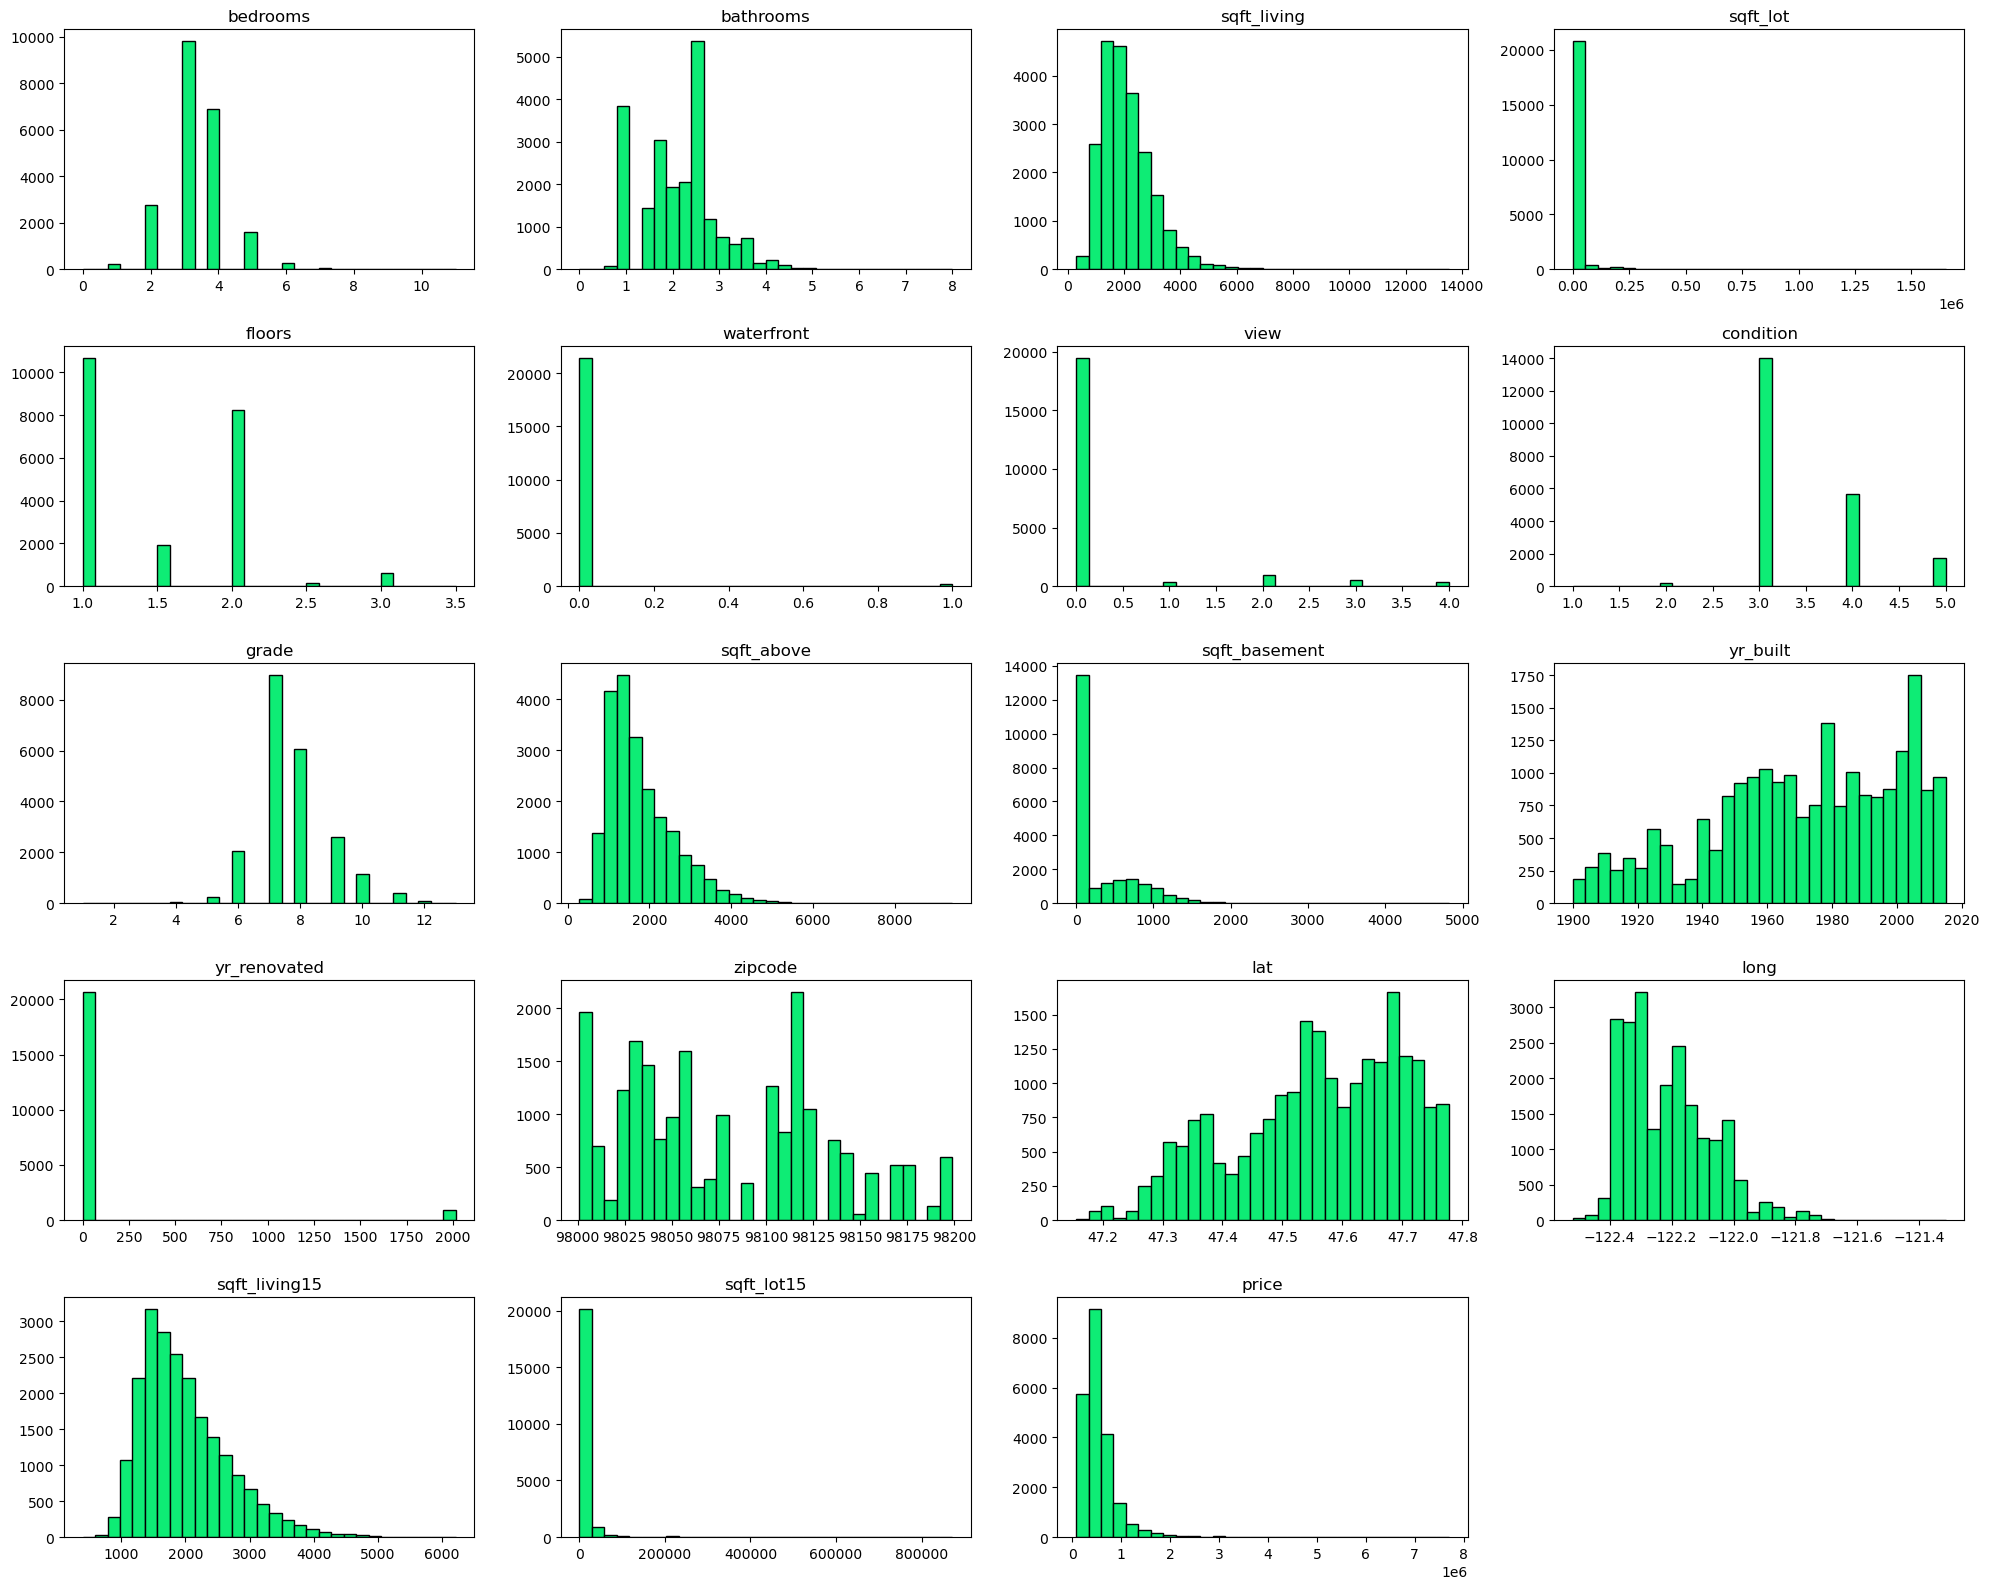

In [55]:
# histogram for all columns apart from date (and "id" which was set as index)

color = '#0eec75'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num_all.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num_all.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num_all.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #ec300e;">Checking Distributions: Boxplots</h3>

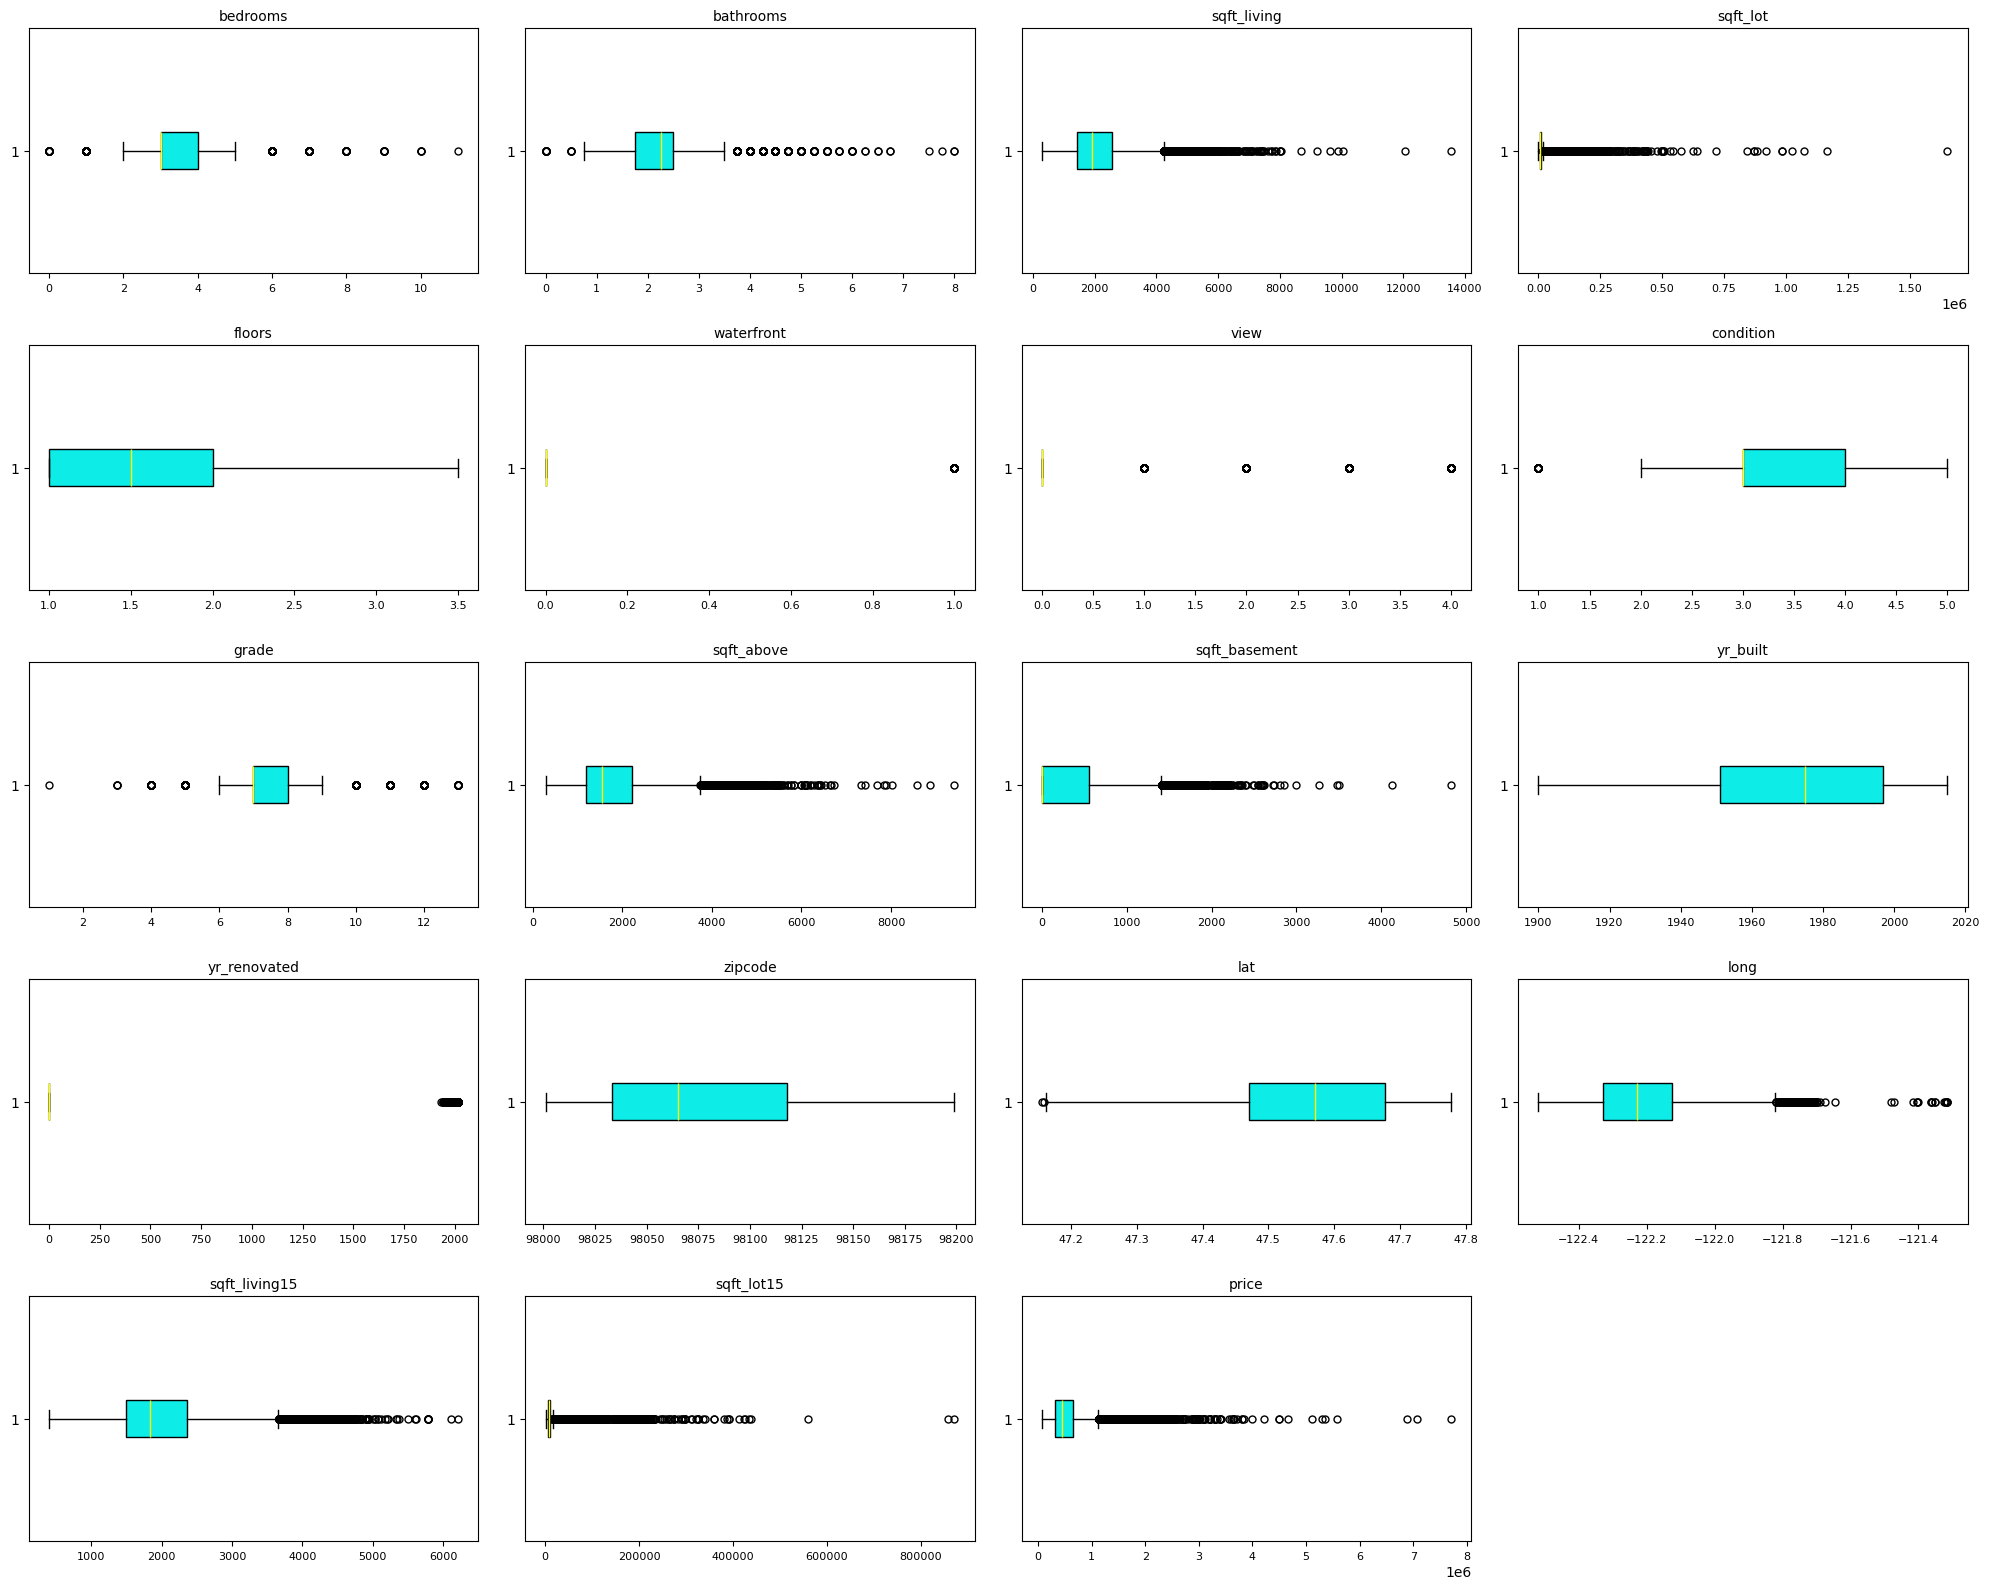

In [57]:
# boxplots for all columns apart from date

color = '#0eece8'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num_all.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num_all.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num_all.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #ec1139;">Conclusions from Visualizations</h3>

The diagrams support our findings from before. There are four **discrete numerical** variables:

- Bedrooms
- Bathrooms
- Floors
- View

The four following variables are **categorical**:

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)


**Continuous numerical variables**: Only three **obviously good features** in the very conservative way (tendency towards normal distribution):

*   sqft_living
*   sqft_above
*   sqft_living15
*   lat and long are also okay

Our **target "price"**:

*   Many outliers
*   Very positively skewed

<h2 style="color: #ec7511;">Checking our Target "price"</h2>

<h3 style="color: #ec300e;">Distribution of Values</h3>

In [62]:
boston_houses["price"].describe()

count      21,613.00
mean      540,088.14
std       367,127.20
min        75,000.00
25%       321,950.00
50%       450,000.00
75%       645,000.00
max     7,700,000.00
Name: price, dtype: float64

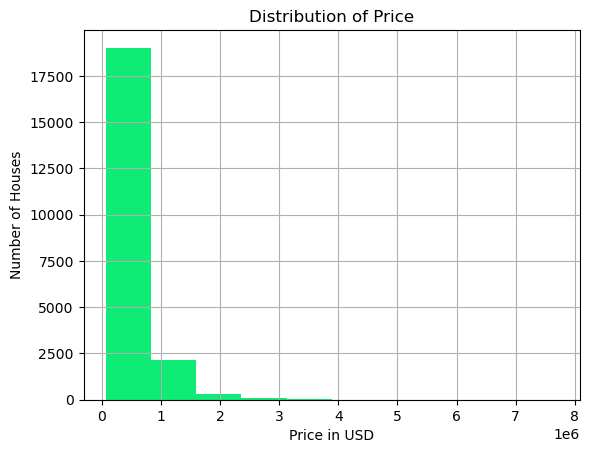

In [63]:
# View price distribution
boston_houses["price"].hist(color="#0eec75")
plt.xlabel('Price in USD')
plt.ylabel('Number of Houses')
plt.title('Distribution of Price')
plt.show()

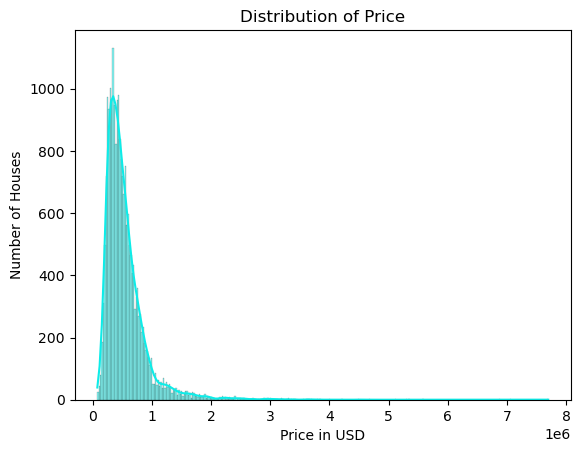

In [64]:
# histplot with kernel density (more bins, so less values on y-axis)
sns.histplot(boston_houses["price"], color="#0eece8", kde=True)
plt.xlabel('Price in USD')
plt.ylabel('Number of Houses')
plt.title('Distribution of Price')
plt.show()

<h4 style="color: #bb1010;">Distribution of Values: Fourth Quartile</h4>

In [66]:
# Look at 0.75 percentile
for i in range (75,100):
    q = i/100
    quantile = boston_houses["price"].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.75 percentile: 645000.0
0.76 percentile: 652500.0
0.77 percentile: 665000.0
0.78 percentile: 677500.0
0.79 percentile: 690000.0
0.8 percentile: 700108.0
0.81 percentile: 718000.0
0.82 percentile: 730000.0
0.83 percentile: 749950.0
0.84 percentile: 760000.4
0.85 percentile: 779494.0
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836780.0
0.89 percentile: 859977.2
0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


In [67]:
# storing houses with prices above the 0.75 percentile (= above USD 650,000) in a new df

houses_high_prices = num_all.copy() # making a copy first

houses_high_prices = num_all[num_all['price'] > num_all['price'].quantile(0.75)]
houses_high_prices.price

id
7237550310   1,225,000.00
1736800520     662,500.00
9297300055     650,000.00
2524049179   2,000,000.00
1794500383     937,000.00
                 ...     
7502800100     679,950.00
191100405    1,575,000.00
7202300110     810,000.00
249000205    1,537,000.00
7936000429   1,007,500.00
Name: price, Length: 5373, dtype: float64

**⏰Insights on Target "price"**:

- As noticed before, there are a lot of **outliers in our target**.
- As stated in the exercise, we are interested in houses that cost **more than US-D 650,000** which means all the houses above the 0.75 percentile.
- We will look at this data more closely using a **regression model**.

<h2 style="color: #ec7511;">Correlations</h2>

<h3 style="color: #ec300e;">All Numerical and Categorial Features</h3>

- We will first check the linear and monotonic correlation for all features (**continuous, discrete, nominal and ordinal**) with price.
- We will then look at scatterplots on the **discrete numerical** values.
- After that, we will then look more closely at the **nominal categorial** data, using the Kruskal-Wallis test 

In [72]:
num_all.shape

(21613, 19)

In [73]:
# checking Pearson (linear) correlation with "price" for all numerical columns:

correlation_pearson  = round(num_all.corrwith(num_all["price"]).sort_values(ascending=False), 2)
correlation_pearson

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.32
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
dtype: float64

In [74]:
num_all.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [75]:
# checking Spearman (monotonic relation) just to see if there is anything interesting which we could not see with checking linearity (Pearson)

correlation_spearman = round(num_all.corr(method='spearman')['price'].sort_values(ascending=False), 3)
correlation_spearman

price            1.00
grade            0.66
sqft_living      0.64
sqft_living15    0.57
sqft_above       0.54
bathrooms        0.50
lat              0.46
bedrooms         0.34
floors           0.32
view             0.29
sqft_basement    0.25
waterfront       0.12
yr_built         0.10
yr_renovated     0.10
sqft_lot         0.07
long             0.06
sqft_lot15       0.06
condition        0.02
zipcode         -0.01
Name: price, dtype: float64

❗**Summary for all numerical variables:**

There is five features with high linear correlation, the others have medium or low correlation

**High correlation** (linear) > 0.5:

- sqft_living (0.7)
- grade (0.67)
- sqft_above (0.61)
- sqft_living15 (0.59)
- bathrooms (0.53)(     )

The explanatory power of Pearson and Spearman correl **limited lim discrete numerical as well asited for nominal and categorial ordinal data**, therefore we will do extra tests and visualizations only 0.063)



<h4 style="color: #bb1010;">Only Discrete Numerical Features: Scatterplots</h4>

We will now take out the discrete variables to see if there are different results with different visualizations which are better suited for discrete numerical values:

Discrete features include:
- bathrooms
- view
- bedrooms
- floors

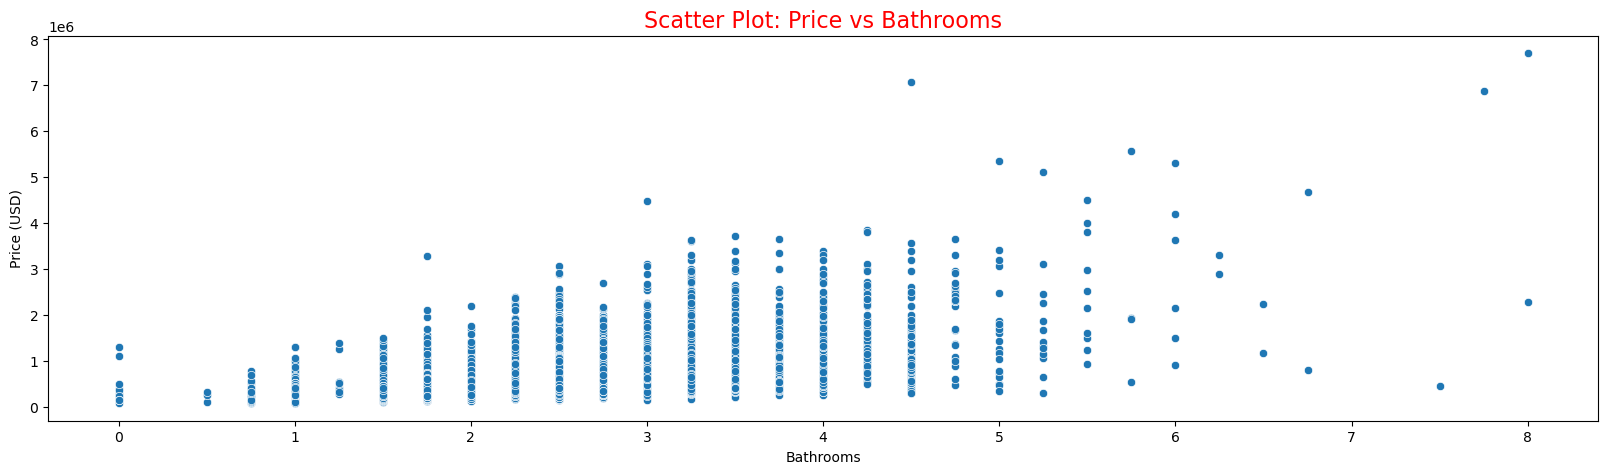

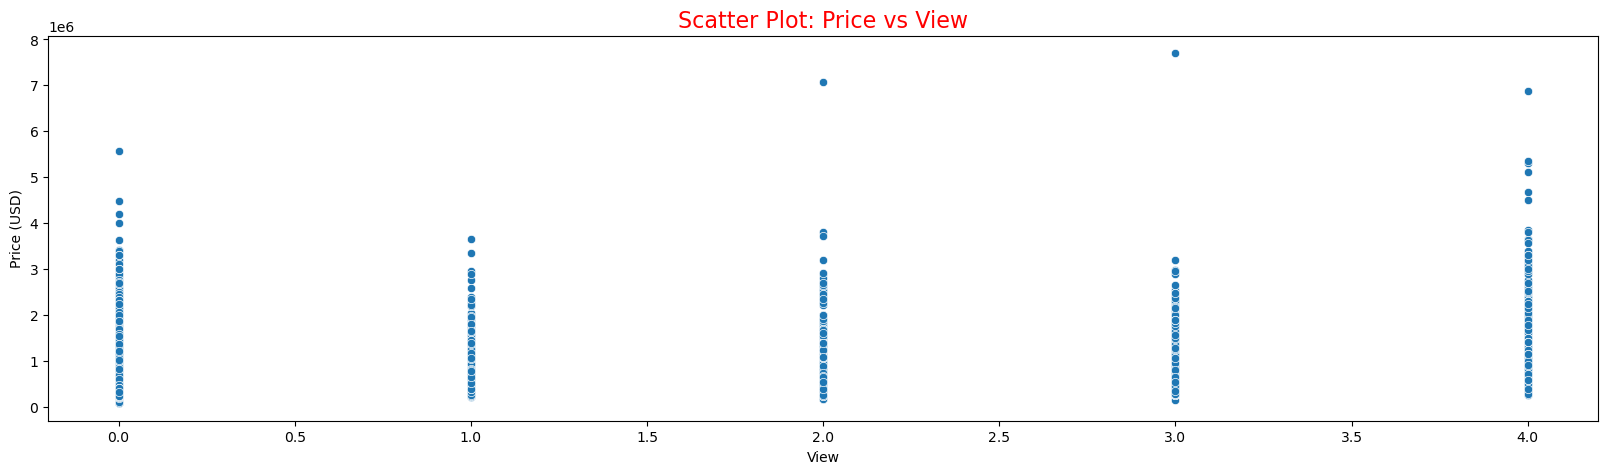

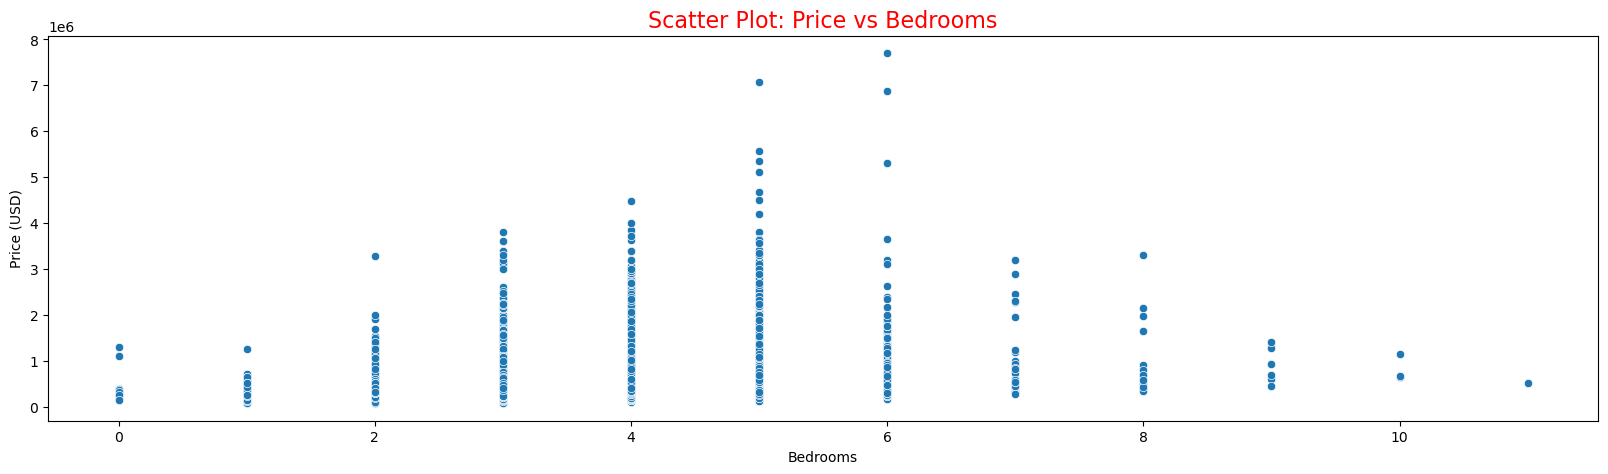

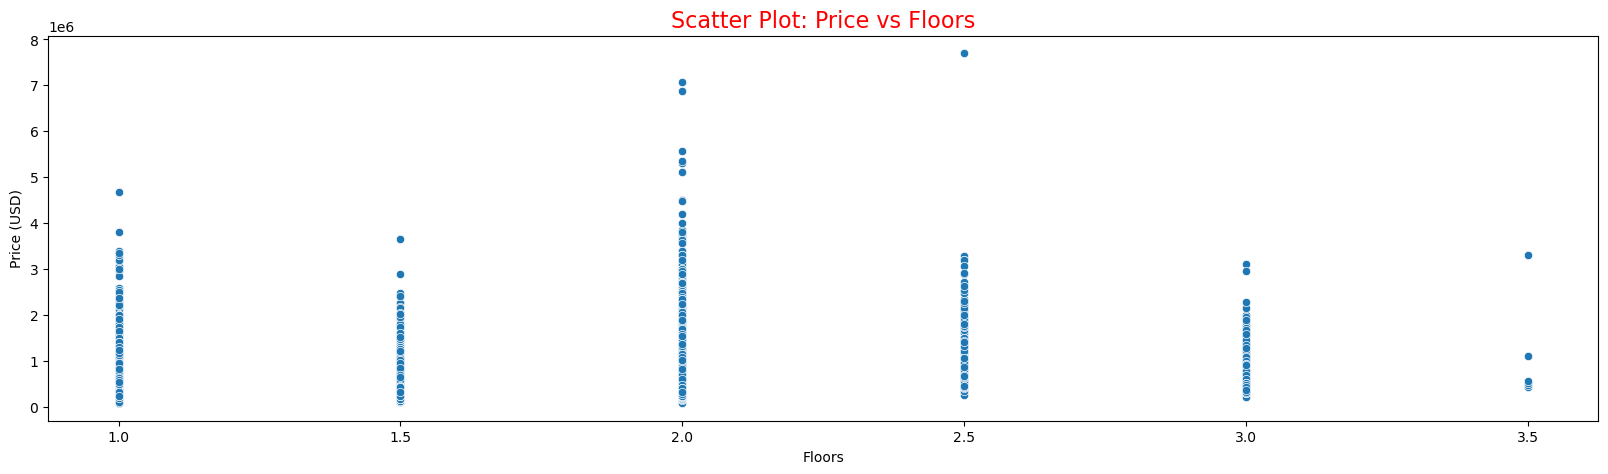

In [79]:
# df for discrete data + "price"
price_features_discrete = num_all[["price", "bathrooms", "view", "bedrooms", "floors"]]

# scatterplot for each features against "price"
for col in price_features_discrete.columns:
    if col != "price":
        plt.figure(figsize=(20, 5))
        plt.title(f"Scatter Plot: Price vs {col.capitalize()}", fontsize=16, color='red')  
        sns.scatterplot(data=price_features_discrete, x=col, y="price")
        plt.xlabel(f"{col.capitalize()}")  
        plt.ylabel("Price (USD)")  
        plt.show()

**Interpretation Scatter Plots**:

- **Bathrooms**: There seems to be a **positive correlation** between price and bathrooms, there also seems to be a c**ertain degree of linearity** but from 4 or 5 bathrooms upwards, the price increase slows down and the correlation becomes less. There might be **saturation** from this number of bathrooms on.

- **Bedrooms**: Bedrooms show a **certain positive tendency** up until 5 bedrooms (outliers with 6), so like bathrooms (and more clearly), there seems to be a **saturation**. Until that number, the relation shows **some linearity** and after that prices do not increase with the number of bedrooms. The Spearman correlation shows a value a little higher then the Pearson, so the relation might even be a little **more monotonic than linear**.

- **View**: There does **not** seem to be a linear tendency here.

- **Floors**: There is also **no linear tendency** to be seen here. Prices for houses with 2 floors (and outliers in 2.5), prices are a bit higher but the relation between floor and price is not linear.


❗**Summary for discrete numerical variables:**

Regarding the regression model

- **Bathrooms** should be kept as feature in the regression model

- **Bedrooms** should be tested

- **View** and **Floors** can be dropped to try ro improve the regression model

<h4 style="color: #bb1010;">Only Categorical Features: Scatterplots on Nominal and Ordinal</h4>

Different analysis on cat variables

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)

In [83]:
# df for all categorical variables + "price"
price_features_cat = num_all[["condition", "grade", "waterfront", "zipcode", "price"]]

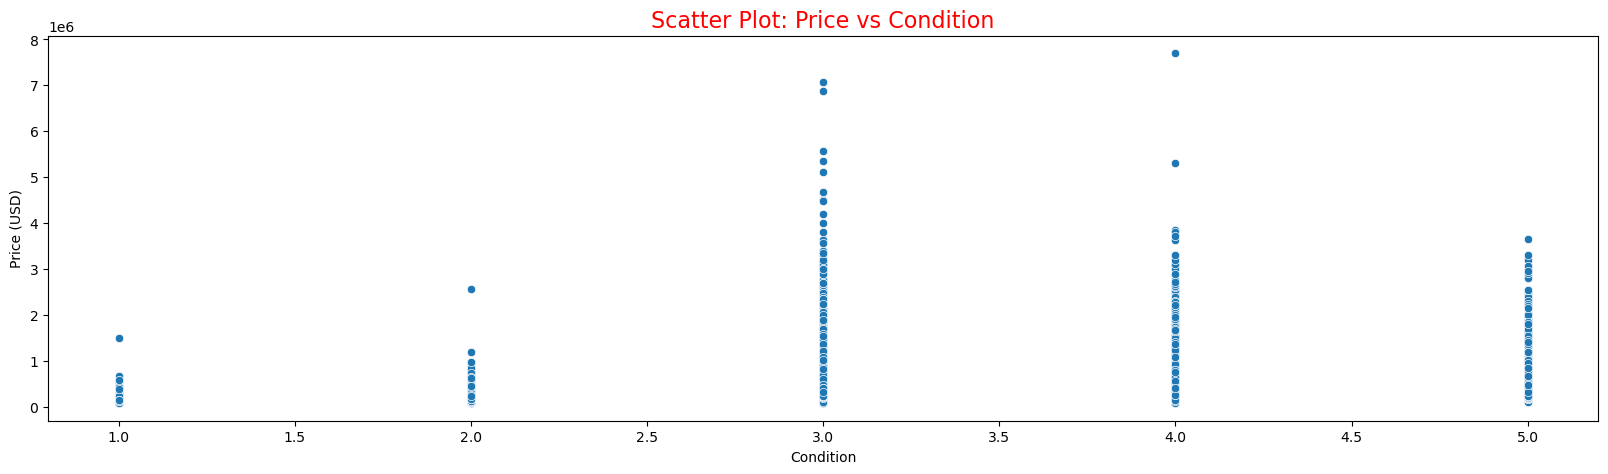

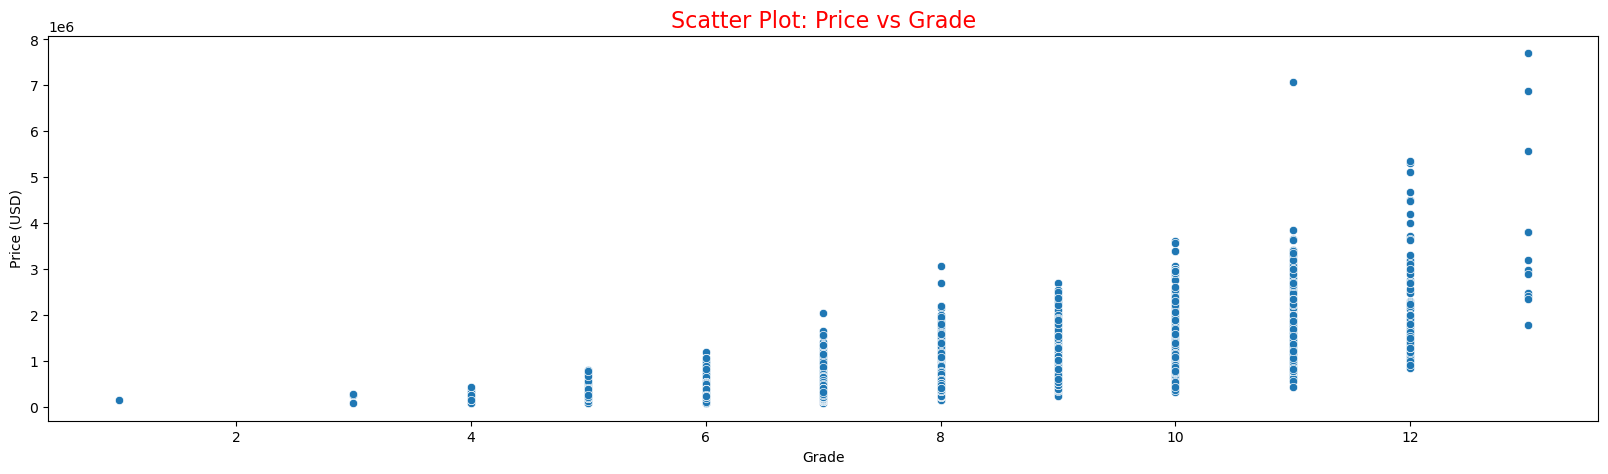

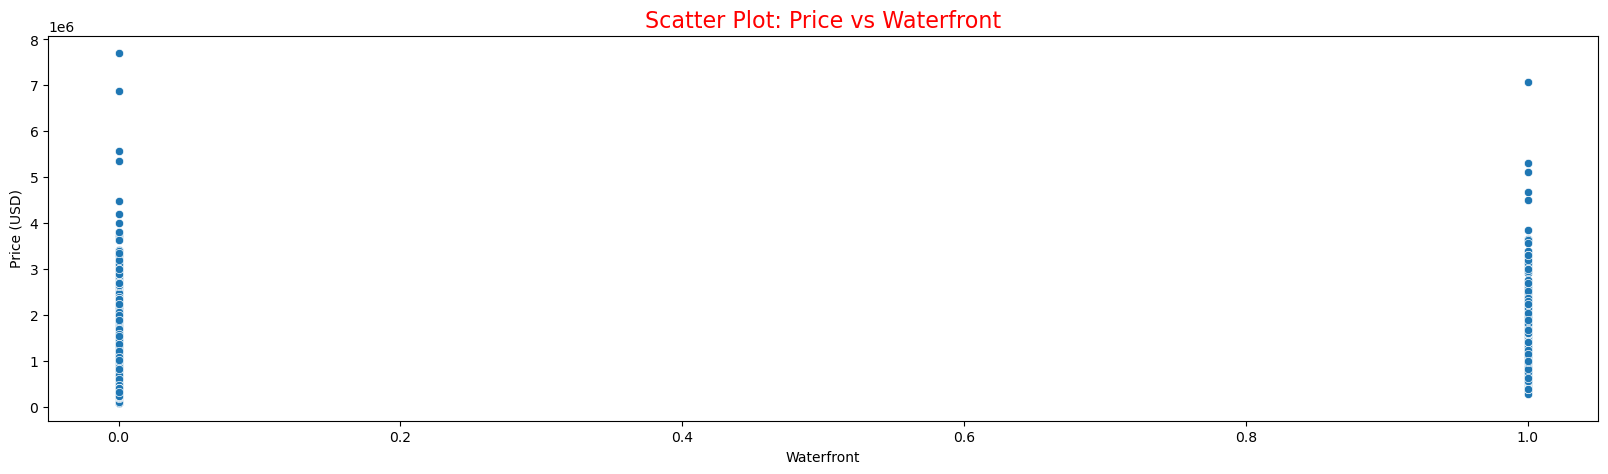

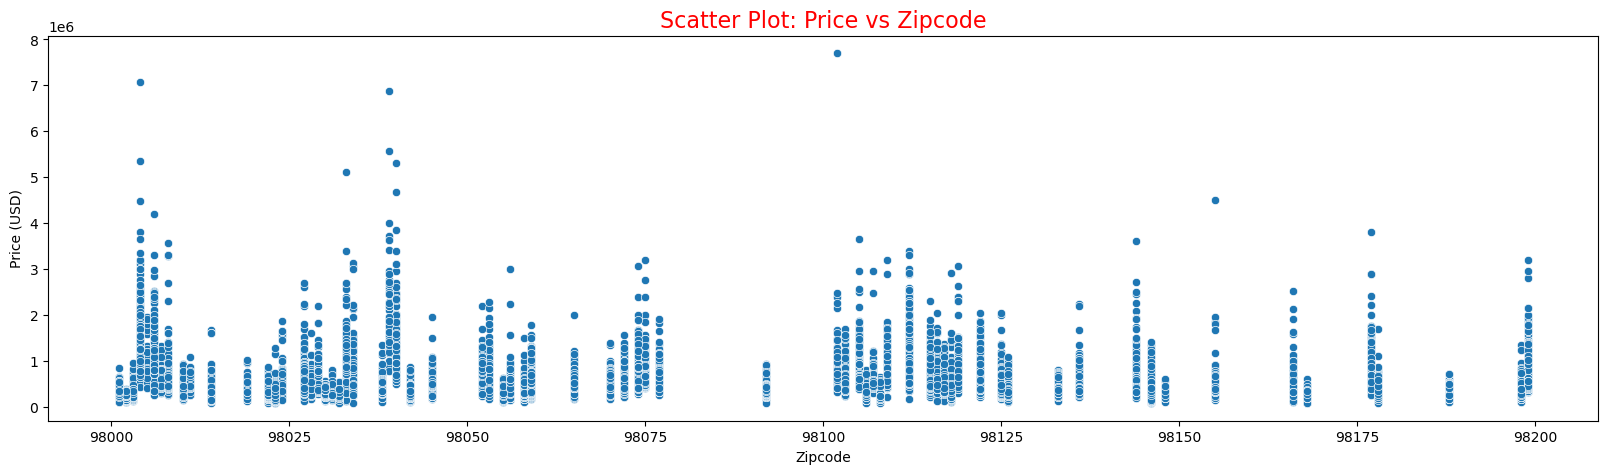

In [84]:
# scatterplot for each features against "price"
for col in price_features_cat.columns:
    if col != "price":
        plt.figure(figsize=(20, 5))
        plt.title(f"Scatter Plot: Price vs {col.capitalize()}", fontsize=16, color='red')  
        sns.scatterplot(data=price_features_cat, x=col, y="price")
        plt.xlabel(f"{col.capitalize()}")  
        plt.ylabel("Price (USD)")  
        plt.show()

**Interpretation Scatter Plots**:

- **Condition**: The scatterplots supports the Pearson Finding: There is no linear relationship between this and the price. Condition does not seem to be a good predictor for price.

- **Grade**: The scatterplot also supports the Pearson correlation: There seems to be a positive linear relationship between grade and price.

- **Waterfront**: There seems to be a strong influence, houses with a waterfront view are higher priced.

- **Zipcode**: There is no linear tendency to be seen here.


❗**Summary for categorial variables:**

Regarding the regression model

- **Grade** and **Waterfront** should be kept as feature in the regression model
- **Condition** should be dropped when trying to improve the regression model
- **Zipcode** should be analyzed in a different way (i.e. with analyzing the means/median prices per zipcode) 

<h4 style="color: #bb1010;">Extra Test on Ordinal Features: Kruskal-Wallis</h4>

In [87]:
# Using Kruskal-Wallis-Test to find out if the different groups in the two ordinal categorial features ("condition" and "grade") have a significant influence on the house price

from scipy.stats import kruskal

# df for all ordinal variables + "price"
price_features_ordinal = price_features_cat[["condition", "grade", "price"]]

# test for "condition"
groups_condition = [price_features_ordinal['price'][price_features_ordinal['condition'] == category] for category in price_features_ordinal['condition'].unique()]
h_stat_condition, p_value_condition = kruskal(*groups_condition)

print(f"Kruskal-Wallis h statistics for condition is: {round(h_stat_condition, 2)} with a p-value of: {p_value_condition}")

# for "grade"
groups_grade = [price_features_ordinal['grade'][price_features_ordinal['grade'] == category] for category in price_features_ordinal['grade'].unique()]
h_stat_grade, p_value_grade = kruskal(*groups_grade)

print(f"Kruskal-Wallis h statistics for grade: {round(h_stat_grade, 2)} with a p-value of: {p_value_grade:.4f}")

Kruskal-Wallis h statistics for condition is: 260.85 with a p-value of: 2.9842751266407488e-55
Kruskal-Wallis h statistics for grade: 21612.0 with a p-value of: 0.0000


**Interpretation of Kruskal-Wallis**:

The test shows for both ordinal variables that they most likely have a **strong influence** on the price of the house. The **extremely low p-values** show significant differences between the house prices in relation to the different groups inside the features.

This result contradicts our findings regarding "condition" so far. We will check condition again later within the regression model but for now we have to assume that it indeed has an influence on our target.

<h2 style="color: #ec7511;">Multicollinearity</h2>


In [90]:
# correlation matrix with Pearson (linearity) to help analyse through visualization
correlation_matrix_all = round(num_all.corr(), 2)

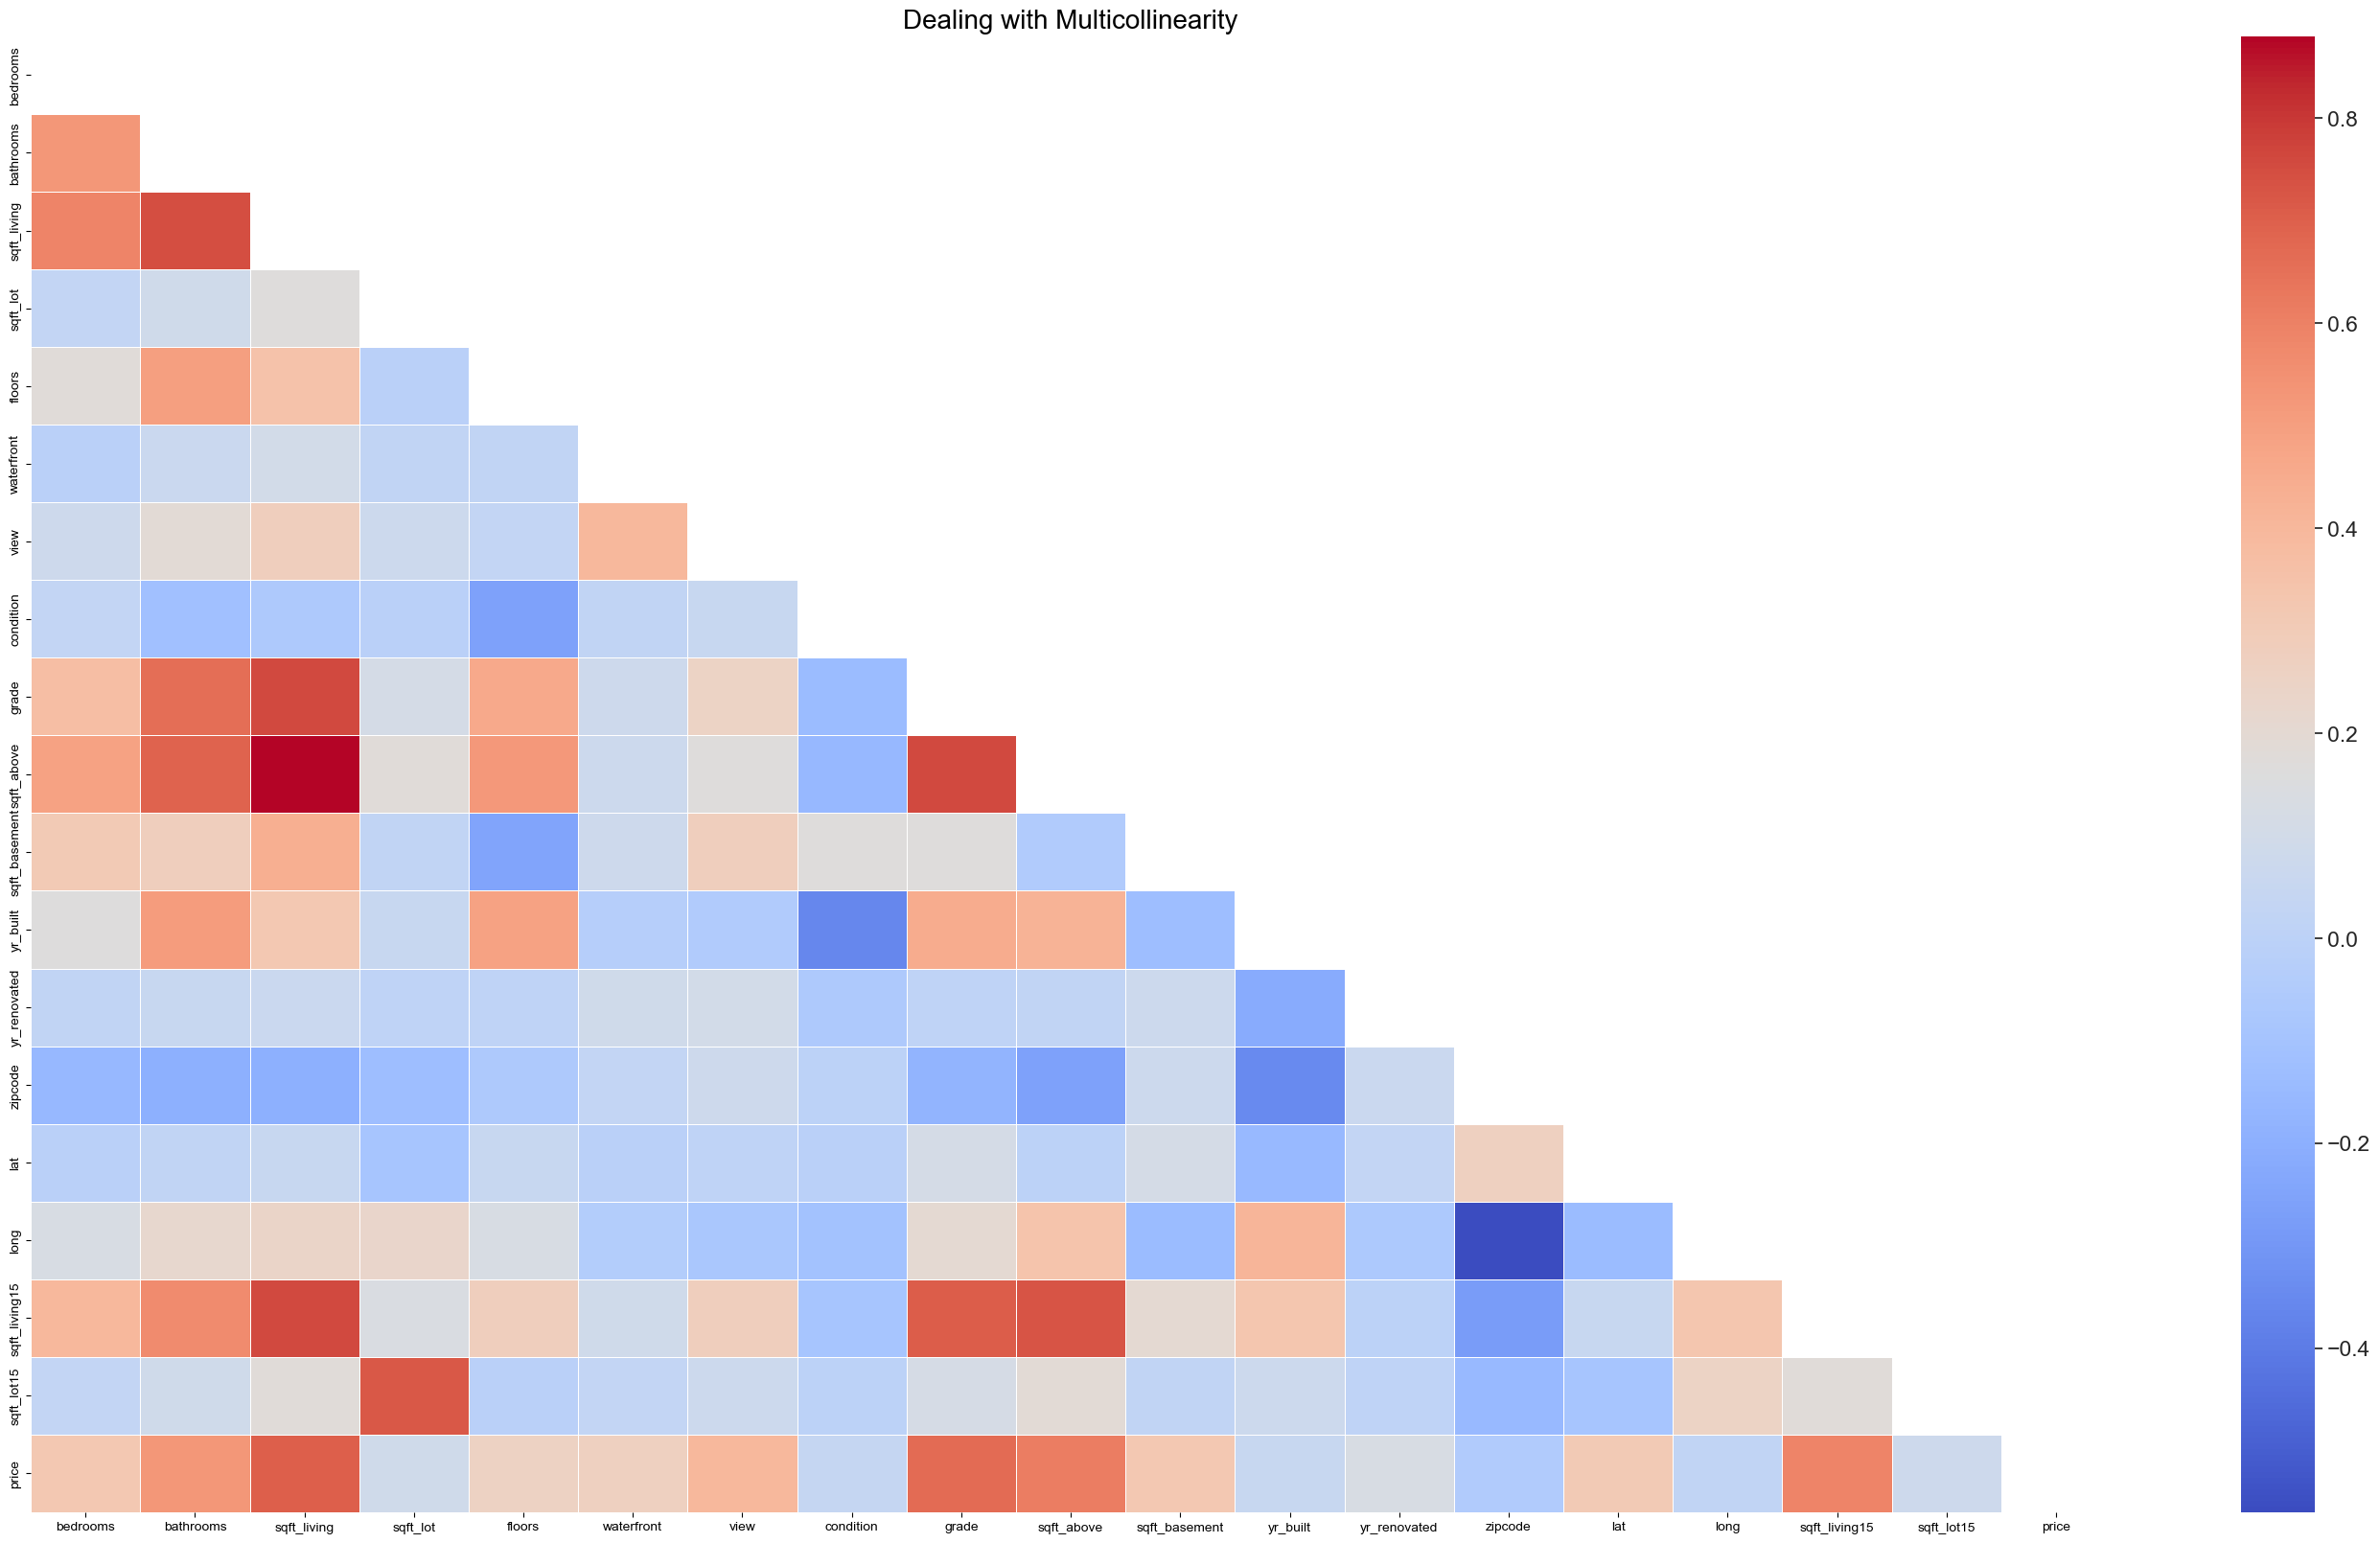

In [91]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(correlation_matrix_all)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 20))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix_all, mask=mask, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

Because the numbers are not shown on the one above and this could not be fixed in time, we include a screenshot of the same data below:

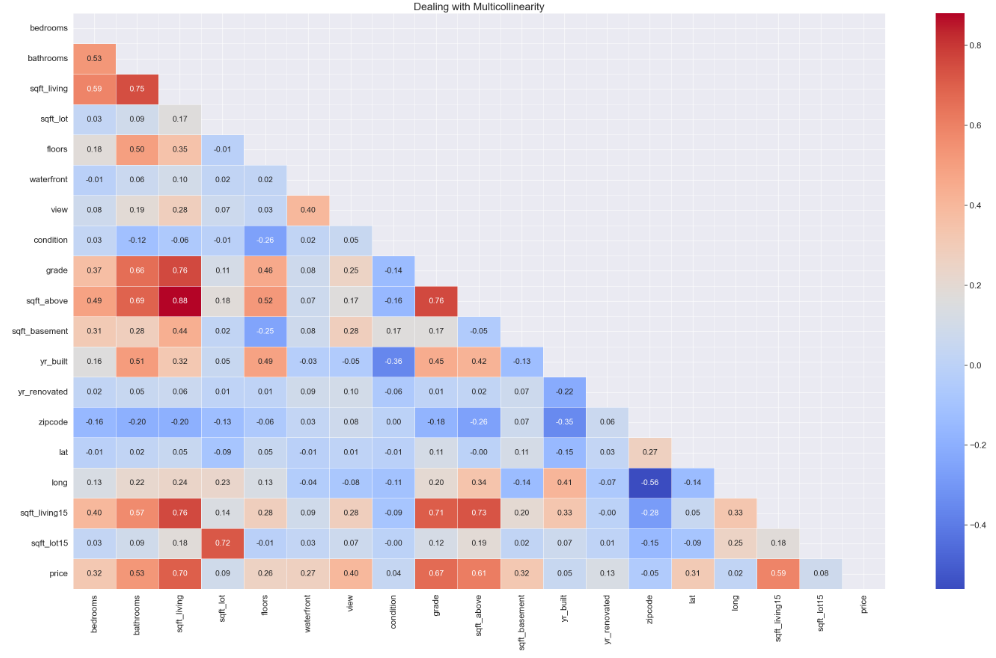

❗**Summary for multicollinearity:**

Features with high multicollinearity:

- **sqft_above**: very high correlation with **sqft_living** (**0.88**) but sqft_living has a higher correlation with the target (0.70 vs. 0.61)

   ▶ **But both have a relatively high correlation**

- **sqft_living15**: very high correlation with **sqft_living** (**0.76**) but sqft_living has a higher correlation with the target (0.70 vs. 0.59)

   ▶ **But both have a relatively high correlation**

- **grade**: very high correlation with **sqft_living** (**0.76**) but sqft_living has a higher correlation with the target (0.70 vs. 0.67)

   ▶ **BUT ONLY VERY SLIGHTLY AND BOTH SHOW HIGH CORRELATION**

- **bathrooms**: very high correlation with **sqft_living** (**0.75**) but sqft_living has a higher correlation with the target (0.70 vs. 0.53)

   ▶ **And we did see that bathrooms up until a certain number seems to have a tendency to a linear relation to the target**

- **sqft_lot15**: very high correlation with **sqft_lot** (0.72) but sqft_lot has a higher correlation with the target (0.09 vs. 0.08)
  
   ▶ **BUT BOTH HAVE VERY LOW CORRELATION WITH THE TARGET**

<h2 style="color: #ec7511;">Some more EDA on Selected Variables</h2>

We want to gain some deeper insights on specific columns using EDA. This is to see their individual impact on the variable "price".

Therefore, we will look at three different questions:

1. Subset "duplicates" (of "id")

2. Nominal binary variable "waterfront" (here we also want to check if we should include the feature in the regression model or not)

<h3 style="color: #ec300e;">1. Subset Duplicates of "id"</h3>

⏰ ... unfortunately, we did not have time for this but it would be interesting

<h3 style="color: #ec300e;">2. Nominal Binary Variable "waterfront"</h3>




In [100]:
round(len(num_all[num_all['waterfront'] == 1])/len(num_all)*100, 2)

0.75

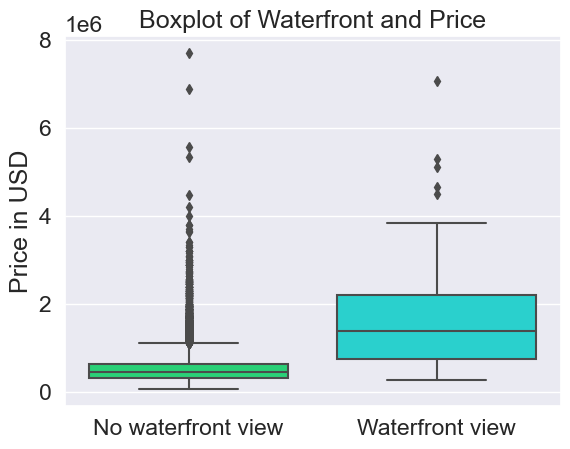

In [101]:
# Plot boxplot of waterfront feature
sns.boxplot(x = num_all['waterfront'], y = num_all['price'], palette=["#0eec75", "#0eece8"])
plt.title("Boxplot of Waterfront and Price")
plt.ylabel("Price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No waterfront view', 'Waterfront view'))
plt.show()

In [102]:
waterfront_price_mean = num_all[num_all['waterfront'] == 1]['price'].mean()
no_waterfront_price_mean = num_all[num_all['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfront_price_mean,2)}")
print(f"The mean house price for a house with no waterfront view is USD {round(no_waterfront_price_mean,2)}")

The mean house price for a house with waterfront view is USD 1661876.02
The mean house price for a house with no waterfront view is USD 531563.6


❗**Summary of waterfront**:

The **mean price** for a house **with a waterfront** view is **more than three times** the price than for houses **without a waterfront** view.

But **only 0.75 percent** of all sold houses **have a waterfront** view, so there is only a few datapoints for this analysis.

<h1 style="color: #e3db24;">04 | Feature Selection Baseline Regression Model</h1>

<h2 style="color: #ec7511;">Feature Set 1: All Features with Linear, Ridge, Random Forest and Gradient Boosting Regression</h2>

- We will first create a **baseline model** in which we include **every feature** given to us (Feature Set 1). We will use a **Linear Regression** for this even though some of our features only show very low linearity with the target.
- After that, we will compare the same set of features in a **Ridge Regression** which might be more suitable for our data because it is more robust against **multicollinearity**.
- As a third model, we will use **XGBoost** for a **Gradient Boosting Regression** because it is more efficient for **non-linear** and **categorial** data. It is more prone to overfitting though, therefore, we will look closely at the results.
- As a fourth and final model, we will use **Random Forest** because it is **similarly strong as XGBoost** regarding non-linear, non-normally distributed data and outliers, but **less prone to overfitting**.
- For the Feature Set 1, we will also display dataframes which show the actual values, the prediction values and their difference in separate columns. For all improvement steps, we will not do this.

**Outlook**:

After comparing the results of these four models, we will then **select different sets of features** and also to do some **feature engineering** to try to **improve the model**.

<h2 style="color: #ec7511;">X-Y Split for Feature Set 1</h2>

In [108]:
feature_set_1 = num_all.copy()

In [109]:
X = feature_set_1.drop("price", axis=1)
y = feature_set_1["price"]

<h1 style="color: #e3db24;">05 | Modeling for Feature Set 1</h1>

<h2 style="color: #ec7511;">Train-Test Split for Feature Set 1</h2>

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
print(f'100% of our data: {len(feature_set_1)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h2 style="color: #ec7511;">Model: Linear Regression</h2>

In [115]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Model Validation**

In [117]:
# Make predictions on the test dataset
predictions_linear_1 = model.predict(X_test)
predictions_linear_1

array([ 455598.86439844,  744461.18142464, 1242378.50409811, ...,
        376108.32821159,  814839.6793663 ,  579823.66341833])

<h3 style="color: #ec300e;">Comparing Actual and Prediction Values</h3>

In [119]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df1 = pd.DataFrame({"actual":y_test,"pred":predictions_linear_1})
eval_df1["pred"] = eval_df1["pred"].round(2)
eval_df1

,actual,pred
id,,
2591820310,365000.00,455598.86
7974200820,865000.00,744461.18
7701450110,1038000.00,1242378.50
9522300010,1490000.00,1671752.16
9510861140,711000.00,739522.87
...,...,...
1402660150,412000.00,525213.45
2301400325,760000.00,658742.34
6150200005,410500.00,376108.33


In [120]:
# show the difference between actual and prediction
eval_df1["diff"] = abs(eval_df1["actual"]-eval_df1["pred"])
eval_df1.head()

,actual,pred,diff
id,,,
2591820310,365000.00,455598.86,90598.86
7974200820,865000.00,744461.18,120538.82
7701450110,1038000.00,1242378.50,204378.50
9522300010,1490000.00,1671752.16,181752.16
9510861140,711000.00,739522.87,28522.87


<h3 style="color: #ec300e;">Metrics</h3>

In [122]:
r2_LG_1 = r2_score(y_test, predictions_linear_1)
RMSE_LG_1 = mean_squared_error(y_test, predictions_linear_1, squared=False)
MSE_LG_1 = mean_squared_error(y_test, predictions_linear_1)
MAE_LG_1 = mean_absolute_error(y_test, predictions_linear_1)

In [123]:
#Printing the results
print("Linear Regression with Feature Set 1")
print("R2 = ", round(r2_LG_1, 2))
print("RMSE = ", round(RMSE_LG_1, 2))
print("MSE = ", round(MSE_LG_1, 2))
print("MAE = ", round(MAE_LG_1, 2))

Linear Regression with Feature Set 1
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.49
MAE =  127569.11


<h2 style="color: #ec7511;">Model: Ridge Regression</h2>

In [125]:
from sklearn.linear_model import Ridge

In [126]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [127]:
predictions_ridge_1 = ridge.predict(X_test)

<h3 style="color: #ec300e;">Comparing Actual and Prediction Values</h3>

In [129]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_ridge_1})
eval_df2["pred"] = eval_df2["pred"].round(2)
eval_df2.head()

,actual,pred
id,,
2591820310,365000.00,455828.31
7974200820,865000.00,744076.56
7701450110,1038000.00,1242734.14
9522300010,1490000.00,1671838.93
9510861140,711000.00,739349.00


In [130]:
eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.sample(5)

,actual,pred,dif
id,,,
7640400070,665000.00,793862.05,128862.05
567000755,450000.00,399621.08,50378.92
1773100275,205000.00,161717.29,43282.71
862000020,800000.00,322860.81,477139.19
8647800150,273000.00,415600.72,142600.72


<h3 style="color: #ec300e;">Metrics</h3>

In [132]:
r2_RR_1 = r2_score(y_test, predictions_ridge_1)
RMSE_RR_1 = mean_squared_error(y_test, predictions_ridge_1, squared=False)
MSE_RR_1 = mean_squared_error(y_test, predictions_ridge_1)
MAE_RR_1 = mean_absolute_error(y_test, predictions_ridge_1)

In [133]:
#Printing the results
print("Ridge Regression with Feature Set 1")
print("R2 = ", round(r2_RR_1, 2))
print("RMSE = ", round(RMSE_RR_1, 2))
print("MSE = ", round(MSE_RR_1, 2))
print("MAE = ", round(MAE_RR_1, 2))

Ridge Regression with Feature Set 1
R2 =  0.7
RMSE =  208308.84
MSE =  43392570958.39
MAE =  127562.64


<h2 style="color: #ec7511;">Model: XGboost </h2>

In [135]:
import xgboost as xgb

In [136]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
predictions_xgb_1 = xgbr.predict(X_test)

<h3 style="color: #ec300e;">Comparing Actual and Prediction Values</h3>

In [139]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df3 = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_1})
eval_df3["pred"] = eval_df3["pred"].round(2)
eval_df3.head()

,actual,pred
id,,
2591820310,365000.00,439345.03
7974200820,865000.00,874589.81
7701450110,1038000.00,1148093.75
9522300010,1490000.00,2626800.25
9510861140,711000.00,754779.12


In [140]:
eval_df3["dif"] = abs(eval_df3["actual"]-eval_df3["pred"])
eval_df3.sample(5)

,actual,pred,dif
id,,,
9477000120,383000.00,357080.41,25919.59
7696620100,254999.00,233712.36,21286.64
9558010190,365500.00,374472.28,8972.28
7169500130,495000.00,524741.75,29741.75
7852011020,527900.00,581032.31,53132.31


<h3 style="color: #ec300e;">Metrics</h3>

In [142]:
r2_XG_1 = r2_score(y_test, predictions_xgb_1)
RMSE_XG_1 = mean_squared_error(y_test, predictions_xgb_1, squared=False)
MSE_XG_1 = mean_squared_error(y_test, predictions_xgb_1)
MAE_XG_1 = mean_absolute_error(y_test, predictions_xgb_1)

In [143]:
#Printing the results
print("XGBoost with Feature Set 1")
print("R2 = ", round(r2_XG_1, 2))
print("RMSE = ", round(RMSE_XG_1, 2))
print("MSE = ", round(MSE_XG_1, 2))
print("MAE = ", round(MAE_XG_1, 2))

XGBoost with Feature Set 1
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


<h2 style="color: #ec7511;">Model: Random Forest </h2>

In [145]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions_rf = rfr.predict(X_test)

<h3 style="color: #ec300e;">Comparing Actual and Prediction Values</h3>

In [147]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_dfRF = pd.DataFrame({"actual":y_test,"pred":predictions_rf})
eval_dfRF["pred"] = eval_dfRF["pred"].round(2)

eval_dfRF["dif"] = abs(eval_dfRF["actual"]-eval_dfRF["pred"])
eval_dfRF.sample(5)

,actual,pred,dif
id,,,
425069139,600000.00,667919.56,67919.56
4307330280,355000.00,380270.50,25270.50
2788400090,250000.00,278510.90,28510.90
2407900200,530000.00,438588.99,91411.01
6669020500,330000.00,321262.63,8737.37


<h3 style="color: #ec300e;">Metrics</h3>

In [149]:
r2_RF_1 = r2_score(y_test, predictions_rf)
RMSE_RF_1 = mean_squared_error(y_test, predictions_rf, squared=False)
MSE_RF_1 = mean_squared_error(y_test, predictions_rf)
MAE_RF_1 = mean_absolute_error(y_test, predictions_rf)

#Printing the results
print("Random Forest with Feature Set 1")
print("R2 = ", round(r2_RF_1, 2))
print("RMSE = ", round(RMSE_RF_1, 2))
print("MSE = ", round(MSE_RF_1, 2))
print("MAE = ", round(MAE_RF_1, 2))

Random Forest with Feature Set 1
R2 =  0.86
RMSE =  142494.96
MSE =  20304813179.81
MAE =  73411.22


<h2 style="color: #ec7511;">Comparing the 4 Models (based on Feature Set 1)</h2>

In [151]:
print("Metrics for Feature Set 1")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_1, 2))
print("RMSE = ", round(RMSE_LG_1, 2))
print("MSE = ", round(MSE_LG_1, 2))
print("MAE = ", round(MAE_LG_1, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_1, 2))
print("RMSE = ", round(RMSE_RR_1, 2))
print("MSE = ", round(MSE_RR_1, 2))
print("MAE = ", round(MAE_RR_1, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_1, 2))
print("RMSE = ", round(RMSE_XG_1, 2))
print("MSE = ", round(MSE_XG_1, 2))
print("MAE = ", round(MAE_XG_1, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_1, 2))
print("RMSE = ", round(RMSE_RF_1, 2))
print("MSE = ", round(MSE_RF_1, 2))
print("MAE = ", round(MAE_RF_1, 2))

Metrics for Feature Set 1

----------Linear Regression--------------
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.49
MAE =  127569.11
-----------Ridge--------------
R2 =  0.7
RMSE =  208308.84
MSE =  43392570958.39
MAE =  127562.64
-----------XGBoost--------------
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84
-----------Random Forest--------------
R2 =  0.86
RMSE =  142494.96
MSE =  20304813179.81
MAE =  73411.22


In [152]:
print(f"The mean price for a house is: {round(num_all.price.mean(), 2)}")
print(f"The median price for a house is: {round(num_all.price.median(), 2)}")

The mean price for a house is: 540088.14
The median price for a house is: 450000.0


<h3 style="color: #ec300e;">Interpretation of the Metrics</h3>

❓❗**Interpretation of Metrics and Evaluation of Models (Feature Set 1)**:

- RSME always (a lot) higher than MAE (almost double): points to many **outliers** in the data.

- Linear and Ridge are both based on the assumption of linearity. Yet they show quite **high explanatory power** (R²).

- **XGBoost** and **Random Forest** perform really well. But even this very good model shows quite high error rates: **XGBoost**: MAE with over 70,000 USD is 13% difference to mean price; RSME (which penalizes outliers more than MAE) with almost 140,000 USD shows even around 25% difference to the mean price of a house.


<h1 style="color: #e3db24;">06 | Improving the Model A</h1>

<h2 style="color: #ec7511;">Approach 1: Only Features Highly Correlated with the Target (Feature Set 2)</h2>

There is enough grounds here to try to **improve the model**. We suspect that the explanatory power might improve by **selecting less predictors** which is what we will try first.

For the next set of features, we will eliminate all the variables which have a low correlation with the target "price". We will **NOT** yet erase variables based solely on the ground of **multicollinearity** as among these are such with a high bilateral predictive power.

**Set of Features 2:**

We will **drop**:
- lat
- sqft_basement
- yr_built
- yr_renovated
- sqft_lot
- long
- sqft_lot15
- view
- floors
- condition

We will **keep**:
- sqft_living
- sqft_living15
- sqft_above
- bathrooms
- bedrooms
- grade
- waterfront
- zipcode

In [158]:
feature_set_2 = num_all[["price", "sqft_living", "sqft_living15", "sqft_above", "bathrooms", "bedrooms", "grade", "waterfront", "zipcode"]]
feature_set_2

,price,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,grade,waterfront,zipcode
id,,,,,,,,,
7129300520,221900.00,1180,1340,1180,1.00,3,7,0,98178
6414100192,538000.00,2570,1690,2170,2.25,3,7,0,98125
5631500400,180000.00,770,2720,770,1.00,2,6,0,98028
2487200875,604000.00,1960,1360,1050,3.00,4,7,0,98136
1954400510,510000.00,1680,1800,1680,2.00,3,8,0,98074
...,...,...,...,...,...,...,...,...,...
263000018,360000.00,1530,1530,1530,2.50,3,8,0,98103
6600060120,400000.00,2310,1830,2310,2.50,4,8,0,98146
1523300141,402101.00,1020,1020,1020,0.75,2,7,0,98144


<h3 style="color: #ec300e;">X-y Split</h3>

In [160]:
X_feature_set_2 = feature_set_2.drop("price", axis=1)
y_feature_set_2 = feature_set_2["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [162]:
X_train_feature_set_2, X_test_feature_set_2, y_train_feature_set_2, y_test_feature_set_2 = train_test_split(X_feature_set_2, y_feature_set_2, test_size=0.3, random_state=42)

In [163]:
print(f'100% of our data: {len(feature_set_2)}.')
print(f'70% for training data: {len(X_train_feature_set_2)}.')
print(f'30% for test data: {len(X_test_feature_set_2)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec300e;">Linear Regression</h3>

In [165]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_2,y_train_feature_set_2)

LinearRegression()

In [166]:
# Make predictions on the test dataset
predictions_linear_2 = model.predict(X_test_feature_set_2)
predictions_linear_2

array([ 523002.53130772,  727505.54699197, 1139864.01265264, ...,
        318816.5953487 ,  722405.46050168,  616851.03391103])

<h4 style="color: #bb1010;">Metrics</h4>

In [168]:
r2_LG_2 = r2_score(y_test_feature_set_2, predictions_linear_2)
RMSE_LG_2 = mean_squared_error(y_test_feature_set_2, predictions_linear_2, squared=False)
MSE_LG_2 = mean_squared_error(y_test_feature_set_2, predictions_linear_2)
MAE_LG_2 = mean_absolute_error(y_test_feature_set_2, predictions_linear_2)

In [169]:
#Printing the results
print("Linear Regression with Feature Set 2")
print("R2 = ", round(r2_LG_2, 2))
print("RMSE = ", round(RMSE_LG_2, 2))
print("MSE = ", round(MSE_LG_2, 2))
print("MAE = ", round(MAE_LG_2, 2))

Linear Regression with Feature Set 2
R2 =  0.59
RMSE =  243246.11
MSE =  59168670001.5
MAE =  158482.99


<h3 style="color: #ec300e;">Ridge Regression</h3>

In [171]:
ridge = Ridge()
ridge.fit(X_train_feature_set_2,y_train_feature_set_2)

Ridge()

In [172]:
predictions_ridge_2 = ridge.predict(X_test_feature_set_2)

<h4 style="color: #bb1010;">Metrics</h4>

In [174]:
r2_RR_2 = r2_score(y_test_feature_set_2, predictions_ridge_2)
RMSE_RR_2 = mean_squared_error(y_test_feature_set_2, predictions_ridge_2, squared=False)
MSE_RR_2 = mean_squared_error(y_test_feature_set_2, predictions_ridge_2)
MAE_RR_2 = mean_absolute_error(y_test_feature_set_2, predictions_ridge_2)

In [175]:
#Printing the results
print("Ridge Regression with Feature Set 2")
print("R2 = ", round(r2_RR_2, 2))
print("RMSE = ", round(RMSE_RR_2, 2))
print("MSE = ", round(MSE_RR_2, 2))
print("MAE = ", round(MAE_RR_2, 2))

Ridge Regression with Feature Set 2
R2 =  0.59
RMSE =  243265.6
MSE =  59178153740.21
MAE =  158493.79


<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [177]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_feature_set_2,y_train_feature_set_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [178]:
predictions_xgb_2 = xgbr.predict(X_test_feature_set_2)

<h4 style="color: #bb1010;">Metrics</h4>

In [180]:
r2_XG_2 = r2_score(y_test_feature_set_2, predictions_xgb_2)
RMSE_XG_2 = mean_squared_error(y_test_feature_set_2, predictions_xgb_2, squared=False)
MSE_XG_2 = mean_squared_error(y_test_feature_set_2, predictions_xgb_2)
MAE_XG_2 = mean_absolute_error(y_test_feature_set_2, predictions_xgb_2)

In [181]:
#Printing the results
print("XGBoost with Feature Set 2")
print("R2 = ", round(r2_XG_2, 2))
print("RMSE = ", round(RMSE_XG_2, 2))
print("MSE = ", round(MSE_XG_2, 2))
print("MAE = ", round(MAE_XG_2, 2))

XGBoost with Feature Set 2
R2 =  0.81
RMSE =  166464.4
MSE =  27710396028.73
MAE =  84395.89


<h3 style="color: #ec300e;">Random Forest Regression</h3>

In [183]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_2,y_train_feature_set_2)
predictions_rf_2 = rfr.predict(X_test_feature_set_2)

<h4 style="color: #bb1010;">Metrics</h4>

In [185]:
r2_RF_2 = r2_score(y_test_feature_set_2, predictions_rf_2)
RMSE_RF_2 = mean_squared_error(y_test_feature_set_2, predictions_rf_2, squared=False)
MSE_RF_2 = mean_squared_error(y_test_feature_set_2, predictions_rf_2)
MAE_RF_2 = mean_absolute_error(y_test_feature_set_2, predictions_rf_2)

#Printing the results
print("Random Forest with Feature Set 2")
print("R2 = ", round(r2_RF_2, 2))
print("RMSE = ", round(RMSE_RF_2, 2))
print("MSE = ", round(MSE_RF_2, 2))
print("MAE = ", round(MAE_RF_2, 2))

Random Forest with Feature Set 2
R2 =  0.79
RMSE =  174214.01
MSE =  30350521125.48
MAE =  90305.85


<h3 style="color: #ec300e;">Comparing the 4 Models (Based on Feature Set 2)</h3>

In [187]:
print("Metrics for Feature Set 2")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_2, 2))
print("RMSE = ", round(RMSE_LG_2, 2))
print("MSE = ", round(MSE_LG_2, 2))
print("MAE = ", round(MAE_LG_2, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_2, 2))
print("RMSE = ", round(RMSE_RR_2, 2))
print("MSE = ", round(MSE_RR_2, 2))
print("MAE = ", round(MAE_RR_2, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_2, 2))
print("RMSE = ", round(RMSE_XG_2, 2))
print("MSE = ", round(MSE_XG_2, 2))
print("MAE = ", round(MAE_XG_2, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_2, 2))
print("RMSE = ", round(RMSE_RF_2, 2))
print("MSE = ", round(MSE_RF_2, 2))
print("MAE = ", round(MAE_RF_2, 2))

Metrics for Feature Set 2

----------Linear Regression--------------
R2 =  0.59
RMSE =  243246.11
MSE =  59168670001.5
MAE =  158482.99
-----------Ridge--------------
R2 =  0.59
RMSE =  243265.6
MSE =  59178153740.21
MAE =  158493.79
-----------XGBoost--------------
R2 =  0.81
RMSE =  166464.4
MSE =  27710396028.73
MAE =  84395.89
-----------Random Forest--------------
R2 =  0.79
RMSE =  174214.01
MSE =  30350521125.48
MAE =  90305.85


❓❗**Interpretation of Metrics and Evaluation of Models (based on feature set 2)**:

Please see summary after feature set 4 for all metrics summaries up until the models based on feature set 4.


<h2 style="color: #ec7511;">Approach 2: Only Features with High Correlation with the Target AND no high multicollinearity (Feature Set 3)</h2>

This approach will feature a subset from feature_set_2: We will drop features with high multicollinearity among one another and only test features which have a high correlation with the target and at the same time have no high multicorrelation.

Therefore from feature_set_2, we will drop:

- sqft_above
- sqft_living15
- grade
- bathrooms

And only keep:

- sqft_living
- bedrooms
- waterfront
- zipcode

In [191]:
feature_set_3 = feature_set_2.drop(["sqft_above","sqft_living15", "grade", "bathrooms"],  axis=1)
feature_set_3

,price,sqft_living,bedrooms,waterfront,zipcode
id,,,,,
7129300520,221900.00,1180,3,0,98178
6414100192,538000.00,2570,3,0,98125
5631500400,180000.00,770,2,0,98028
2487200875,604000.00,1960,4,0,98136
1954400510,510000.00,1680,3,0,98074
...,...,...,...,...,...
263000018,360000.00,1530,3,0,98103
6600060120,400000.00,2310,4,0,98146
1523300141,402101.00,1020,2,0,98144


<h3 style="color: #ec300e;">X-y Split</h3> 

In [193]:
X_feature_set_3 = feature_set_3.drop("price", axis=1)
y_feature_set_3 = feature_set_3["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [195]:
X_train_feature_set_3, X_test_feature_set_3, y_train_feature_set_3, y_test_feature_set_3 = train_test_split(X_feature_set_3, y_feature_set_3, test_size=0.3, random_state=42)

In [196]:
print(f'100% of our data: {len(feature_set_3)}.')
print(f'70% for training data: {len(X_train_feature_set_3)}.')
print(f'30% for test data: {len(X_test_feature_set_3)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec300e;">Linear Regression</h3>

In [198]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_3,y_train_feature_set_3)

# Make predictions on the test dataset
predictions_linear_3 = model.predict(X_test_feature_set_3)

<h4 style="color: #bb1010;">Metrics</h4>

In [200]:
r2_LG_3 = r2_score(y_test_feature_set_3, predictions_linear_3)
RMSE_LG_3 = mean_squared_error(y_test_feature_set_3, predictions_linear_3, squared=False)
MSE_LG_3 = mean_squared_error(y_test_feature_set_3, predictions_linear_3)
MAE_LG_3 = mean_absolute_error(y_test_feature_set_3, predictions_linear_3)

#Printing the results
print("Linear Regression with Feature Set 3")
print("R2 = ", round(r2_LG_3, 2))
print("RMSE = ", round(RMSE_LG_3, 2))
print("MSE = ", round(MSE_LG_3, 2))
print("MAE = ", round(MAE_LG_3, 2))

Linear Regression with Feature Set 3
R2 =  0.55
RMSE =  256058.41
MSE =  65565907537.66
MAE =  169262.35


<h3 style="color: #ec300e;">Ridge Regression</h3>

In [202]:
ridge = Ridge()
ridge.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_ridge_3 = ridge.predict(X_test_feature_set_3)

<h4 style="color: #bb1010;">Metrics</h4>

In [204]:
r2_RR_3 = r2_score(y_test_feature_set_3, predictions_ridge_3)
RMSE_RR_3 = mean_squared_error(y_test_feature_set_3, predictions_ridge_3, squared=False)
MSE_RR_3 = mean_squared_error(y_test_feature_set_3, predictions_ridge_3)
MAE_RR_3 = mean_absolute_error(y_test_feature_set_3, predictions_ridge_3)

#Printing the results
print("Ridge Regression with Feature Set 3")
print("R2 = ", round(r2_RR_3, 2))
print("RMSE = ", round(RMSE_RR_3, 2))
print("MSE = ", round(MSE_RR_3, 2))
print("MAE = ", round(MAE_RR_3, 2))

Ridge Regression with Feature Set 3
R2 =  0.55
RMSE =  256087.04
MSE =  65580572872.75
MAE =  169274.46


<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [206]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_xgb_3 = xgbr.predict(X_test_feature_set_3)

<h4 style="color: #bb1010;">Metrics</h4>

In [208]:
r2_XG_3 = r2_score(y_test_feature_set_3, predictions_xgb_3)
RMSE_XG_3 = mean_squared_error(y_test_feature_set_3, predictions_xgb_3, squared=False)
MSE_XG_3 = mean_squared_error(y_test_feature_set_3, predictions_xgb_3)
MAE_XG_3 = mean_absolute_error(y_test_feature_set_3, predictions_xgb_3)

#Printing the results
print("XGBoost with Feature Set 3")
print("R2 = ", round(r2_XG_3, 2))
print("RMSE = ", round(RMSE_XG_3, 2))
print("MSE = ", round(MSE_XG_3, 2))
print("MAE = ", round(MAE_XG_3, 2))

XGBoost with Feature Set 3
R2 =  0.77
RMSE =  182341.89
MSE =  33248563236.54
MAE =  92807.89


<h3 style="color: #ec300e;">Random Forest Regression</h3>

In [210]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_rf_3 = rfr.predict(X_test_feature_set_3)

<h4 style="color: #bb1010;">Metrics</h4>

In [212]:
r2_RF_3 = r2_score(y_test_feature_set_3, predictions_rf_3)
RMSE_RF_3 = mean_squared_error(y_test_feature_set_3, predictions_rf_3, squared=False)
MSE_RF_3 = mean_squared_error(y_test_feature_set_3, predictions_rf_3)
MAE_RF_3 = mean_absolute_error(y_test_feature_set_3, predictions_rf_3)

#Printing the results
print("Random Forest with Feature Set 3")
print("R2 = ", round(r2_RF_3, 2))
print("RMSE = ", round(RMSE_RF_3, 2))
print("MSE = ", round(MSE_RF_3, 2))
print("MAE = ", round(MAE_RF_3, 2))

Random Forest with Feature Set 3
R2 =  0.74
RMSE =  192531.98
MSE =  37068563392.65
MAE =  103764.93


<h3 style="color: #ec300e;">Comparing the 4 Models (Based on Feature Set 3)</h3>

In [214]:
print("Metrics for Feature Set 3")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_3, 2))
print("RMSE = ", round(RMSE_LG_3, 2))
print("MSE = ", round(MSE_LG_3, 2))
print("MAE = ", round(MAE_LG_3, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_3, 2))
print("RMSE = ", round(RMSE_RR_3, 2))
print("MSE = ", round(MSE_RR_3, 2))
print("MAE = ", round(MAE_RR_3, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_3, 2))
print("RMSE = ", round(RMSE_XG_3, 2))
print("MSE = ", round(MSE_XG_3, 2))
print("MAE = ", round(MAE_XG_3, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_3, 2))
print("RMSE = ", round(RMSE_RF_3, 2))
print("MSE = ", round(MSE_RF_3, 2))
print("MAE = ", round(MAE_RF_3, 2))

Metrics for Feature Set 3

----------Linear Regression--------------
R2 =  0.55
RMSE =  256058.41
MSE =  65565907537.66
MAE =  169262.35
-----------Ridge--------------
R2 =  0.55
RMSE =  256087.04
MSE =  65580572872.75
MAE =  169274.46
-----------XGBoost--------------
R2 =  0.77
RMSE =  182341.89
MSE =  33248563236.54
MAE =  92807.89
-----------Random Forest--------------
R2 =  0.74
RMSE =  192531.98
MSE =  37068563392.65
MAE =  103764.93


❓❗**Interpretation of Metrics and Evaluation of Models (based on feature set 3)**:

Please see summary after feature set 4 for all metrics summaries up until the models based on feature set 4.

Note to work on feature set 3: We have also tried this set without "**Zipcode**": it made a huge difference in XGBoost and RF metrics (Linear and Ridge) only very little. This is because the first two can compute categorial data much better and apparently **location matters a lot**!

<h2 style="color: #ec7511;">Approach 3: Only Continuous Features with High Correlation with the Target AND no high multicollinearity (Feature Set 4)</h2>

This approach will feature a subset from feature_set_3: We will drop features with high multicollinearity among one another and only test features which have a **high correlation with the target** and at the same time have **no high multicorrelation**.

Therefore from feature_set_3, we will drop:

- sqft_above
- sqft_living15
- grade
- bathrooms
- bedrooms
- waterfront
- zipcode

**And only keep**:

- sqft_living

Also, we will only do a **Linear Regression** and a **Random Forest** Regression because the metrics of the first proved to be about the same as for the Ridge Regression so far and in this set of features we have only linear variables.
Random Forest might be superior to XGBoost because it is less prone to overfit.

In [218]:
feature_set_4 = feature_set_3.drop(["bedrooms", "waterfront", "zipcode"],  axis=1)
feature_set_4

,price,sqft_living
id,,
7129300520,221900.00,1180
6414100192,538000.00,2570
5631500400,180000.00,770
2487200875,604000.00,1960
1954400510,510000.00,1680
...,...,...
263000018,360000.00,1530
6600060120,400000.00,2310
1523300141,402101.00,1020


<h3 style="color: #ec300e;">X-y Split</h3> 

In [220]:
X_feature_set_4 = feature_set_4.drop("price", axis=1)
y_feature_set_4 = feature_set_4["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [222]:
X_train_feature_set_4, X_test_feature_set_4, y_train_feature_set_4, y_test_feature_set_4 = train_test_split(X_feature_set_4, y_feature_set_4, test_size=0.3, random_state=42)

In [223]:
print(f'100% of our data: {len(feature_set_4)}.')
print(f'70% for training data: {len(X_train_feature_set_4)}.')
print(f'30% for test data: {len(X_test_feature_set_4)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec300e;">Linear Regression</h3>

In [225]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_4,y_train_feature_set_4)

# Make predictions on the test dataset
predictions_linear_4 = model.predict(X_test_feature_set_4)

<h4 style="color: #bb1010;">Metrics</h4>

In [227]:
r2_LG_4 = r2_score(y_test_feature_set_4, predictions_linear_4)
RMSE_LG_4 = mean_squared_error(y_test_feature_set_4, predictions_linear_4, squared=False)
MSE_LG_4 = mean_squared_error(y_test_feature_set_4, predictions_linear_4)
MAE_LG_4 = mean_absolute_error(y_test_feature_set_4, predictions_linear_4)

#Printing the results
print("Linear Regression with Feature Set 4")
print("R2 = ", round(r2_LG_4, 2))
print("RMSE = ", round(RMSE_LG_4, 2))
print("MSE = ", round(MSE_LG_4, 2))
print("MAE = ", round(MAE_LG_4, 2))

Linear Regression with Feature Set 4
R2 =  0.48
RMSE =  272965.19
MSE =  74509993356.5
MAE =  177803.05


<h3 style="color: #ec300e;">Random Forest Regression</h3>

In [229]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_4,y_train_feature_set_4)

predictions_rf_4 = rfr.predict(X_test_feature_set_4)

<h4 style="color: #bb1010;">Metrics</h4>

In [231]:
r2_RF_4 = r2_score(y_test_feature_set_4, predictions_rf_4)
RMSE_RF_4 = mean_squared_error(y_test_feature_set_4, predictions_rf_4, squared=False)
MSE_RF_4 = mean_squared_error(y_test_feature_set_4, predictions_rf_4)
MAE_RF_4 = mean_absolute_error(y_test_feature_set_4, predictions_rf_4)

#Printing the results
print("Random Forest with Feature Set 4")
print("R2 = ", round(r2_RF_4, 2))
print("RMSE = ", round(RMSE_RF_4, 2))
print("MSE = ", round(MSE_RF_4, 2))
print("MAE = ", round(MAE_RF_4, 2))

Random Forest with Feature Set 4
R2 =  0.47
RMSE =  277193.86
MSE =  76836438505.65
MAE =  174687.01


<h3 style="color: #ec300e;">Comparing the 2 Models (based on Feature Set 4) </h3>

In [233]:
print("Metrics for Feature Set 4")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_4, 2))
print("RMSE = ", round(RMSE_LG_4, 2))
print("MSE = ", round(MSE_LG_4, 2))
print("MAE = ", round(MAE_LG_4, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_4, 2))
print("RMSE = ", round(RMSE_RF_4, 2))
print("MSE = ", round(MSE_RF_4, 2))
print("MAE = ", round(MAE_RF_4, 2))

Metrics for Feature Set 4

----------Linear Regression--------------
R2 =  0.48
RMSE =  272965.19
MSE =  74509993356.5
MAE =  177803.05
-----------Random Forest--------------
R2 =  0.47
RMSE =  277193.86
MSE =  76836438505.65
MAE =  174687.01


<h2 style="color: #ec7511;">Summary of Improving the Model 1 (Different Set of Features)</h2>

Compared to the baseline model (all numerical features), all other features sets have brought increasingly worse results so far.

The best model until now is Feature Set 1 (all numerical features) with XGBoost, followed closely by the same set of features with Random Forest:

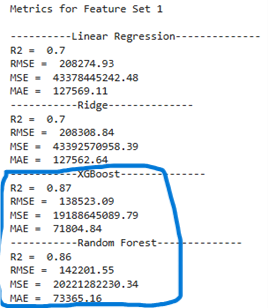

<h1 style="color: #e3db24;">07 | Improving the Model B</h1>

In this approach, we will make some adjustments and feature engineering on **feature_set_4** to further refine the model:

- **Transform** yr_renovated: We will convert the yr_renovated column into a binary variable where:
  - **1** represents a renovated house.
  - **0** represents a house that has not been renovated.
- **Transform** sqft_basement: We will create a binary variable where:
  - **1** indicates the presence of a basement.
  - **0** indicates no basement.
- **Create a new column for the house's age**: We will create a new column, year_house, that calculates the age of the house by subtracting yr_built from the current year. This will allow us to track the age of the house at any given time using the system date.
  

- **Add** area_per_floor: We will calculate the area per floor by dividing the total sqft_living by the total number of floors, including the basement. (the idea didn't work.)

With these transformations and additional features, we will reevaluate the model performance using:

- **LinearRegression**
- **Random Forest Regression**
- **XGBoost model**
- **Ridge model**

In [238]:
df_app4 = data.copy()
df_app4.sample(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<h2 style="color: #ec7511;">Approach 4: Feature Engineering (Feature Set 5)</h2>

In [240]:
df_app4["sqft_basement"] = df_app4["sqft_basement"].apply(lambda x: 1 if x > 0 else 0)
df_app4["yr_renovated"] = df_app4["yr_renovated"].apply(lambda x: 1 if x > 0 else 0)

df_app4["year"] = df_app4["date"].str[:4]
df_app4["year"] = df_app4["date"].str[:4].astype(int)
df_app4["year_house"] = df_app4["year"] - df_app4["yr_built"]

df_app4 = df_app4[[col for col in df_app4.columns if col != 'price'] + ['price']]
df_app4.set_index('id', inplace=True)    #Changing the index to ID

df_app4[df_app4["year_house"].isin([-1])] #We check if there are negative values (we have 12)
df_app4.drop(df_app4[df_app4["year_house"] == -1].index, inplace=True) #finally, we find 12 negative values and drop them.

In [241]:
feature_set_5 = df_app4.drop(["yr_renovated","sqft_above","year","view","floors","condition","yr_built","sqft_lot15","lat","long","sqft_lot","sqft_living15","date"], axis=1)
feature_set_5.sample(1) 

,bedrooms,bathrooms,sqft_living,waterfront,grade,sqft_basement,zipcode,year_house,price
id,,,,,,,,,
9542100135,4,1.75,2350,0,8,0,98005,55,620000.00


<h3 style="color: #ec300e;">Correlation Heatmap</h3> 

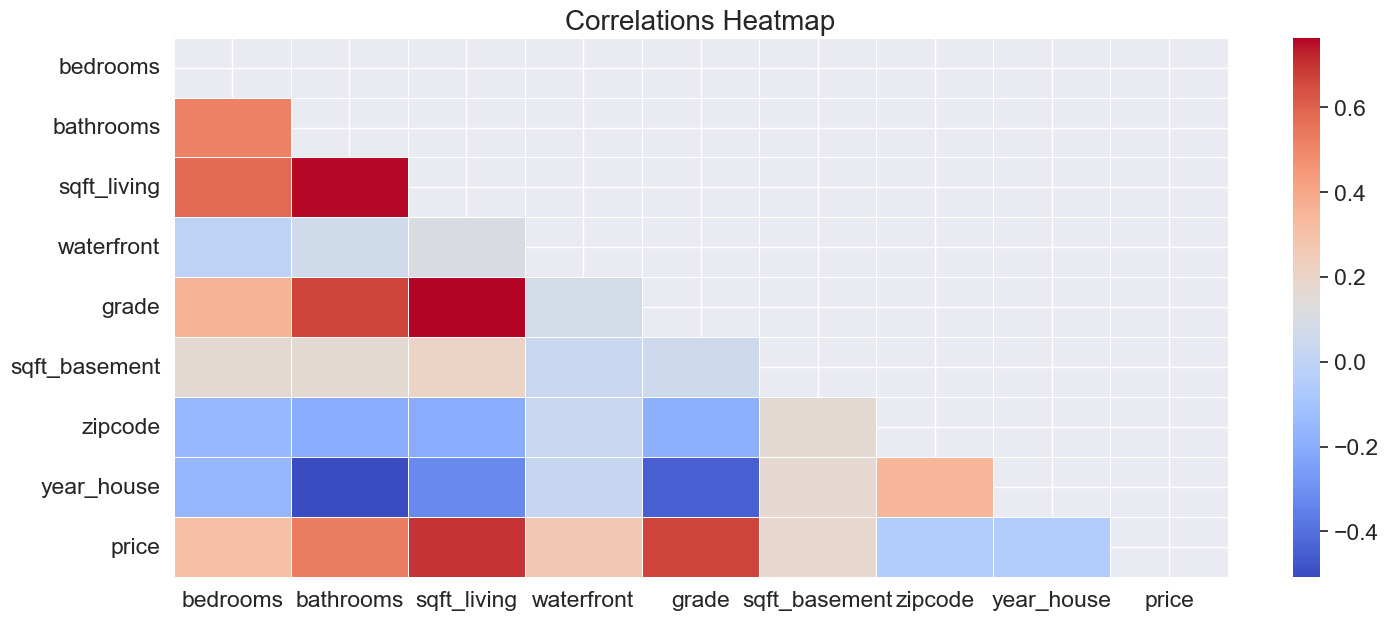

In [243]:
corr_matrix = feature_set_5.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 7))
sns.set(font_scale=1.5)
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    annot_kws={"size": 12},
    linewidths=.5,
    cmap="coolwarm",
    fmt=".2f",
    ax=ax)
ax.set_title("Correlations Heatmap", fontsize=20)
plt.show()

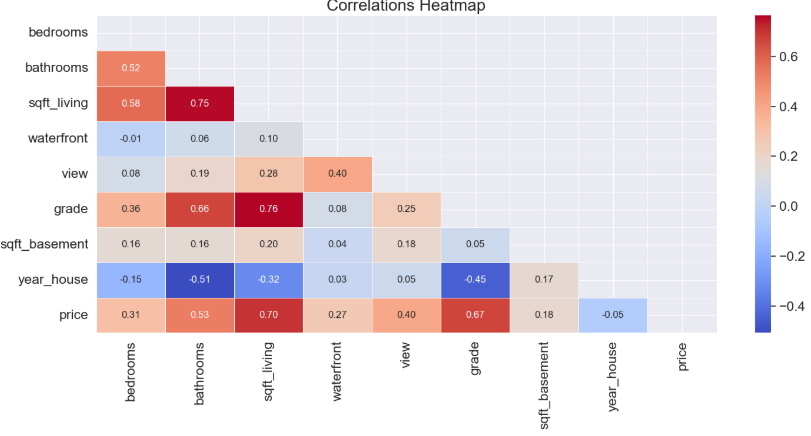

<h3 style="color: #ec300e;">X-y Split</h3> 

In [282]:
X_feature_set_5 = feature_set_5.drop("price", axis=1)
y_feature_set_5 = feature_set_5["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [284]:
X_train_feature_set_5, X_test_feature_set_5, y_train_feature_set_5, y_test_feature_set_5 = train_test_split(X_feature_set_5, y_feature_set_5, test_size=0.3, random_state=42)

<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [286]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_feature_set_5,y_train_feature_set_5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [287]:
predictions_xgb_5 = xgbr.predict(X_test_feature_set_5)

<h4 style="color: #bb1010;">Metrics</h4>

In [289]:
r2_xgb_5 = r2_score(y_test_feature_set_5, predictions_xgb_5)
RMSE_xgb_5 = mean_squared_error(y_test_feature_set_5, predictions_xgb_5, squared=False)
MSE_xgb_5 = mean_squared_error(y_test_feature_set_5, predictions_xgb_5)
MAE_xgb_5 = mean_absolute_error(y_test_feature_set_5, predictions_xgb_5)

print("XGBoost Results")
print("Feature Set 5")
print("R2 = ", round(r2_xgb_5, 3))
print("RMSE = ", round(RMSE_xgb_5, 3))
print("MSE = ", round(MSE_xgb_5, 3))
print("MAE = ", round(MAE_xgb_5, 3))

XGBoost Results
Feature Set 5
R2 =  0.845
RMSE =  152817.093
MSE =  23353064045.665
MAE =  81071.314


<h3 style="color: #ec300e;">Linear Regression</h3>

In [291]:
model = LinearRegression()
model.fit(X_train_feature_set_5, y_train_feature_set_5)

LinearRegression()

In [292]:
predictions_linear_5 = model.predict(X_test_feature_set_5)

<h4 style="color: #bb1010;">Metrics</h4>

In [294]:
r2_LG_5 = r2_score(y_test_feature_set_5, predictions_linear_5)
RMSE_LG_5 = mean_squared_error(y_test_feature_set_5, predictions_linear_5, squared=False)
MSE_LG_5 = mean_squared_error(y_test_feature_set_5, predictions_linear_5)
MAE_LG_5 = mean_absolute_error(y_test_feature_set_5, predictions_linear_5)

print("Linear Regression")
print("Feature Set 5")
print("R2=",round(r2_LG_5, 3))
print("RMSE=",round(RMSE_LG_5, 3))
print("MSE=",round(MSE_LG_5, 3))
print("MAE=",round(MAE_LG_5, 3))

Linear Regression
Feature Set 5
R2= 0.645
RMSE= 231080.192
MSE= 53398055024.996
MAE= 143349.439


<h3 style="color: #ec300e;">Ridge Regression</h3>

In [296]:
ridge = Ridge()
ridge.fit(X_train_feature_set_5, y_train_feature_set_5)

Ridge()

In [297]:
predictions_ridge_5 = ridge.predict(X_test_feature_set_5)

<h4 style="color: #bb1010;">Metrics</h4>

In [299]:
r2_RR_5 = r2_score(y_test_feature_set_5, predictions_ridge_5)
RMSE_RR_5 = mean_squared_error(y_test_feature_set_5, predictions_ridge_5, squared=False)
MSE_RR_5 = mean_squared_error(y_test_feature_set_5, predictions_ridge_5)
MAE_RR_5 = mean_absolute_error(y_test_feature_set_5, predictions_ridge_5)

print("Ridge Regression")
print("Feature Set 5")
print("R2 = ", round(r2_RR_5, 3))
print("RMSE = ", round(RMSE_RR_5, 3))
print("MSE = ", round(MSE_RR_5, 3))
print("MAE = ", round(MAE_RR_5, 3))

Ridge Regression
Feature Set 5
R2 =  0.645
RMSE =  231111.259
MSE =  53412413882.207
MAE =  143355.879


<h3 style="color: #ec300e;">Random Forest Regression</h3>

In [301]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_5, y_train_feature_set_5)

RandomForestRegressor()

In [302]:
predictions_rf_5 = rfr.predict(X_test_feature_set_5)

<h4 style="color: #bb1010;">Metrics</h4>

In [304]:
r2_RF_5 = r2_score(y_test_feature_set_5, predictions_rf_5)
RMSE_RF_5 = mean_squared_error(y_test_feature_set_5, predictions_rf_5, squared=False)
MSE_RF_5 = mean_squared_error(y_test_feature_set_5, predictions_rf_5)
MAE_RF_5 = mean_absolute_error(y_test_feature_set_5, predictions_rf_5)

print("Random Forest")
print("Feature Set 5")
print("R2 = ", round(r2_RF_5, 3))
print("RMSE = ", round(RMSE_RF_5, 3))
print("MSE = ", round(MSE_RF_5, 3))
print("MAE = ", round(MAE_RF_5, 3))

Random Forest
Feature Set 5
R2 =  0.828
RMSE =  160639.712
MSE =  25805117228.486
MAE =  89733.86


<h3 style="color: #ec300e;">Comparing the 4 Models (Based on Feature Set 5)</h3>

In [306]:
print("Metrics for Feature Set 5")
print("")
print("----------Linear Regression--------------")
print("R2 =", round(r2_LG_5, 3))
print("RMSE =", round(RMSE_LG_5, 3))
print("MSE =", round(MSE_LG_5, 3))
print("MAE =", round(MAE_LG_5, 3))
######
print("-----------Ridge--------------")
print("R2 =", round(r2_RR_5, 3))
print("RMSE =", round(RMSE_RR_5, 3))
print("MSE =", round(MSE_RR_5, 3))
print("MAE =", round(MAE_RR_5, 3))
######
print("-----------XGBoost--------------")
print("R2 =", round(r2_xgb_5, 3))
print("RMSE =", round(RMSE_xgb_5, 3))
print("MSE =", round(MSE_xgb_5, 3))
print("MAE =", round(MAE_xgb_5, 3))
######
print("-----------Random Forest--------------")
print("R2 =", round(r2_RF_5, 3))
print("RMSE =", round(RMSE_RF_5, 3))
print("MSE =", round(MSE_RF_5, 3))
print("MAE =", round(MAE_RF_5, 3))

Metrics for Feature Set 5

----------Linear Regression--------------
R2 = 0.645
RMSE = 231080.192
MSE = 53398055024.996
MAE = 143349.439
-----------Ridge--------------
R2 = 0.645
RMSE = 231111.259
MSE = 53412413882.207
MAE = 143355.879
-----------XGBoost--------------
R2 = 0.845
RMSE = 152817.093
MSE = 23353064045.665
MAE = 81071.314
-----------Random Forest--------------
R2 = 0.828
RMSE = 160639.712
MSE = 25805117228.486
MAE = 89733.86


<h4 style="color: #bb1010;">Interpretation</h4>

❗**Summary of Metrics and Evaluation of all Models**: ❗

We observe that creating **area_per_floor** does not produce a significant change in performance. The feature **sqft_living** provides a better results.

Our model benefits from adding **year_house** and transforming **sqft_basement** into a binary feature (1 for basement, 0 for no basement), which has a **positive effect** on the model's performance.

**Key Model Insights:**
- **Linear Regression** and **Ridge Regression** show similar performance, both with an **R² of 0.645**.
- **XGBoost** outperforms the others with an **R² of 0.845**, demonstrating the highest accuracy.
- **Random Forest** provides competitive results with an **R² of 0.829**, but still falls behind XGBoost.

These insights suggest that changes made to the columns are positive. **XGBoost** is the best performing model for the given dataset.

<h1 style="color: #e3db24;">08 | Improving the Model C (Normalization, Standardization, Oversampling and Removing Outliers)</h1>

<h2 style="color: #ec7511;">Normalization using MinMaxScaler</h2>

We will use Feature Set 1 for this as this set has so far shown the best results. We will also concentrate on Linear Regression and XGBoost, so that we have two different kinds of regression models to compare.

In [312]:
from sklearn.preprocessing import MinMaxScaler

In [313]:
scaler = MinMaxScaler()

In [314]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

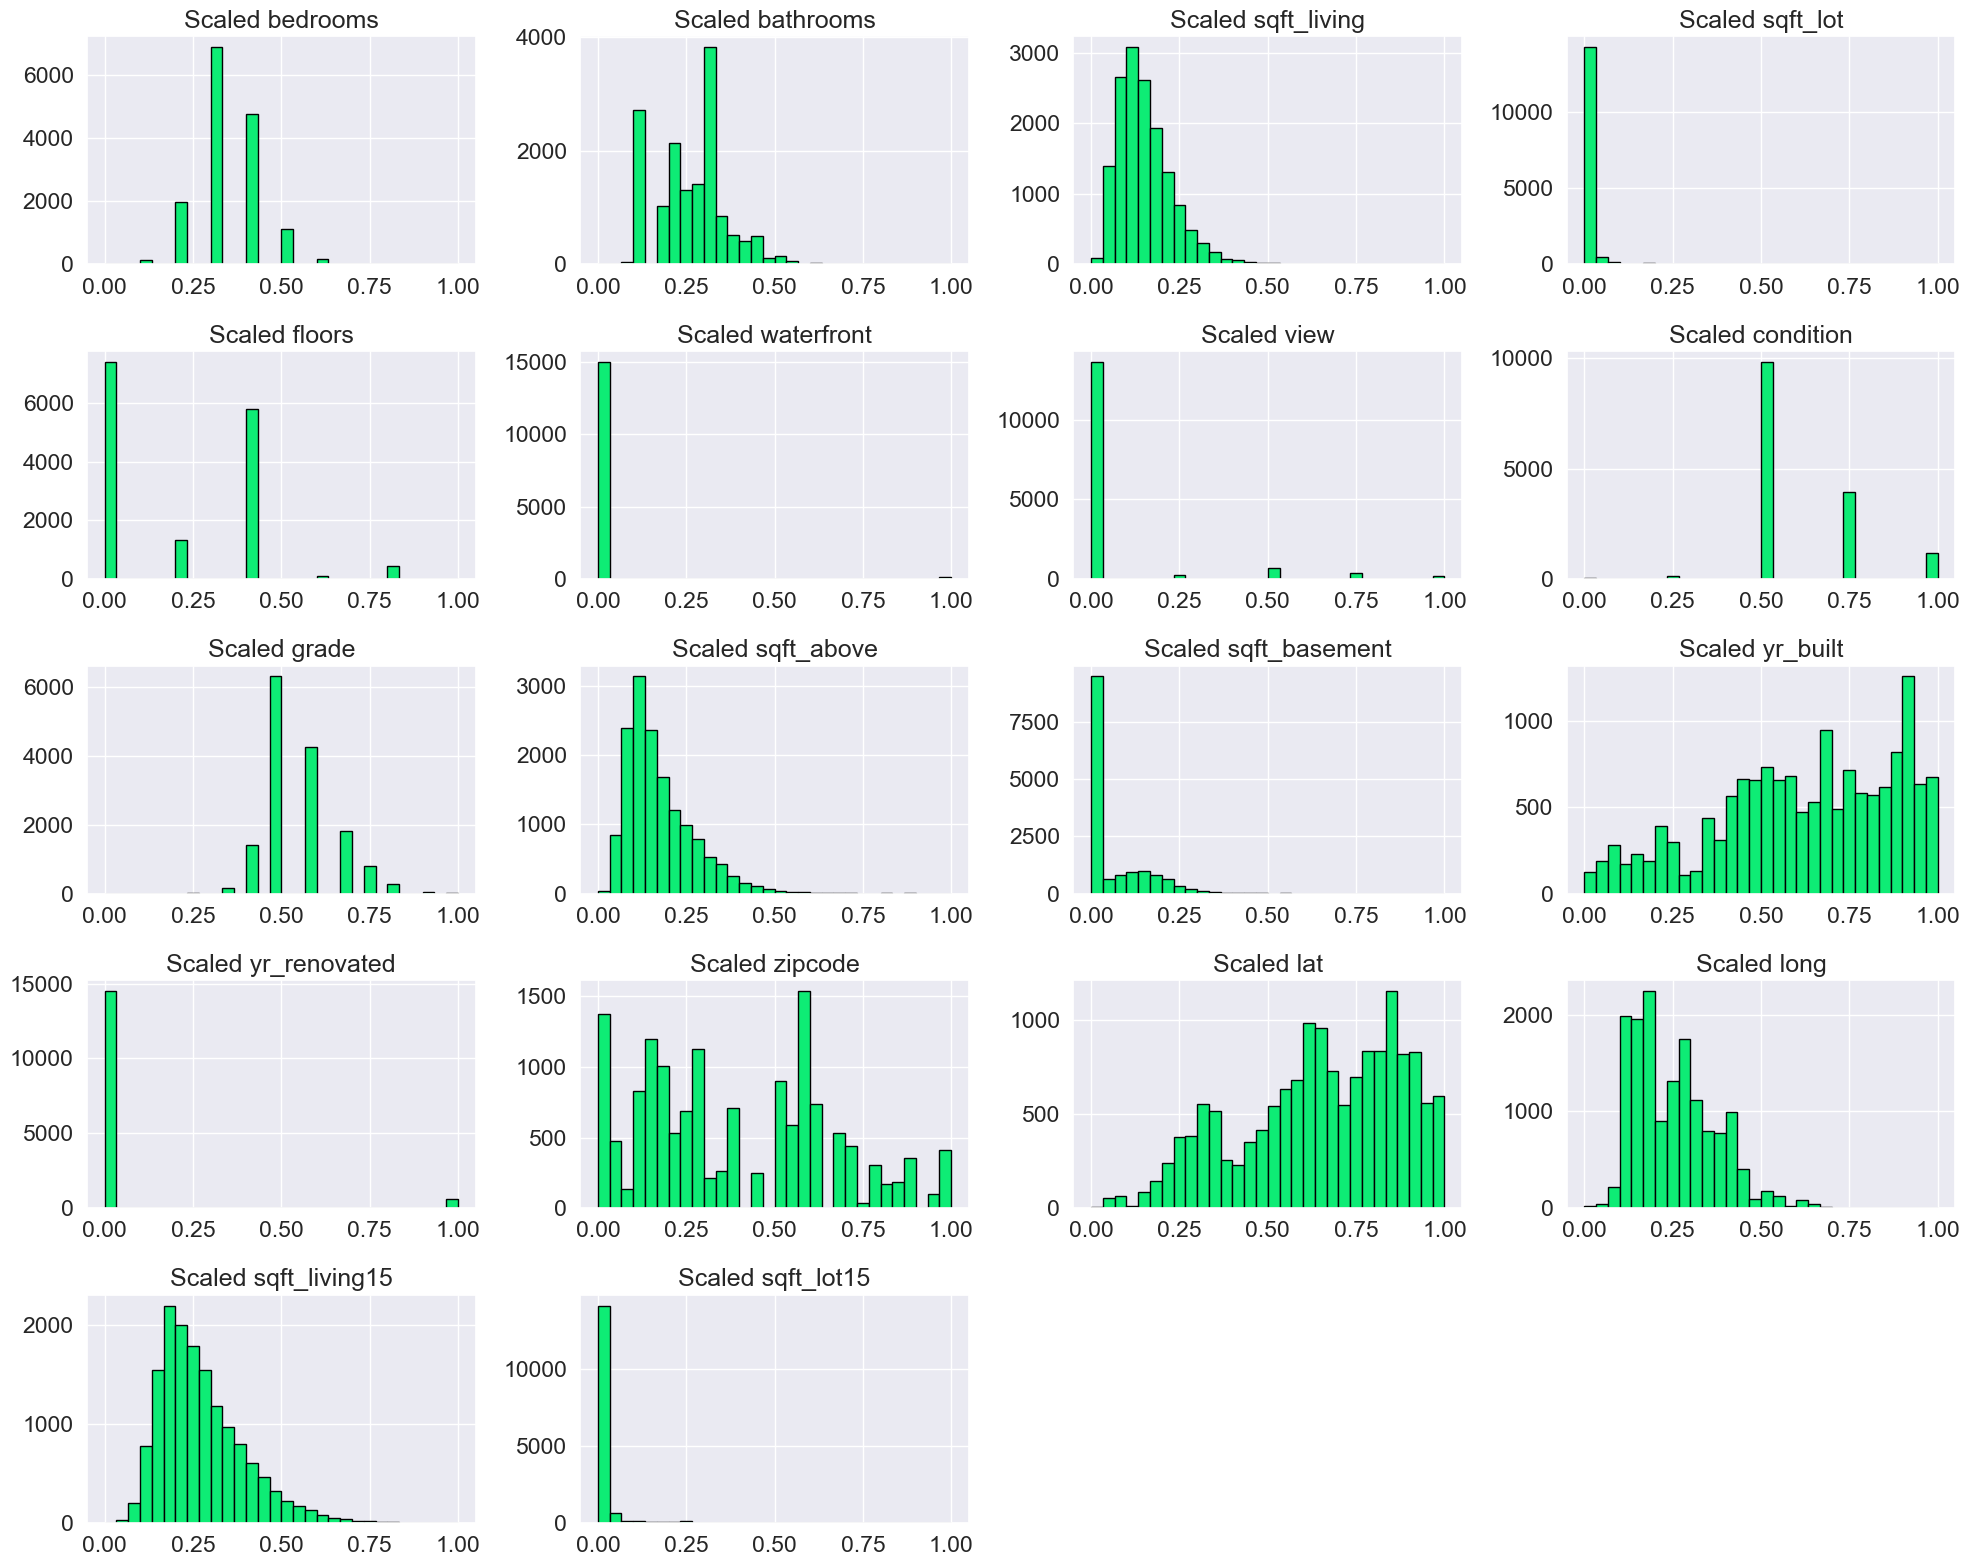

In [315]:
color = '#0eec75'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {feature_set_1.columns[i]}')

plt.tight_layout()
plt.show()

<h3 style="color: #ec300e;">Linear Regression</h3> 

In [317]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions_linear_scaled = model.predict(X_test_scaled)

<h4 style="color: #bb1010;">Metrics</h4>

In [319]:
r2_LG_scaled = r2_score(y_test, predictions_linear_scaled)
RMSE_LG_scaled = mean_squared_error(y_test, predictions_linear_scaled, squared=False)
MSE_LG_scaled = mean_squared_error(y_test, predictions_linear_scaled)
MAE_LG_scaled = mean_absolute_error(y_test, predictions_linear_scaled)

#Printing the results
print("Linear Regression with")
print("Feature Set 1 and Scaled")
print("R2 = ", round(r2_LG_scaled, 2))
print("RMSE = ", round(RMSE_LG_scaled, 2))
print("MSE = ", round(MSE_LG_scaled, 2))
print("MAE = ", round(MAE_LG_scaled, 2))

Linear Regression with
Feature Set 1 and Scaled
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.48
MAE =  127569.11


**No difference** at all to the Linear Regression without Scaling



<h3 style="color: #ec300e;">XGBoost Regression</h3> 

In [322]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_scaled = xgbr.predict(X_test_scaled)

<h4 style="color: #bb1010;">Metrics</h4>

In [324]:
r2_XG_scaled = r2_score(y_test, predictions_xgb_scaled)
RMSE_XG_scaled = mean_squared_error(y_test, predictions_xgb_scaled, squared=False)
MSE_XG_scaled = mean_squared_error(y_test, predictions_xgb_scaled)
MAE_XG_scaled = mean_absolute_error(y_test, predictions_xgb_scaled)

#Printing the results
print("XGBoost with Feature Set 1")
print(" and Scaled")
print("R2 = ", round(r2_XG_scaled, 2))
print("RMSE = ", round(RMSE_XG_scaled, 2))
print("MSE = ", round(MSE_XG_scaled, 2))
print("MAE = ", round(MAE_XG_scaled, 2))

XGBoost with Feature Set 1
 and Scaled
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


<h3 style="color: #ec300e;">Comparing the Metrics</h3>

A **very small improvement** compared to XGBoost metrics without scaling (all metrics but R² went down a little).

<h3 style="color: #ec300e;">KNN Regression</h3>

Because the two other models showed no reaction to normalization through scaling whatsoever, we will check KNN because it is more likely to be responsive for scaling. Just to be sure our code is not the problem.

In [329]:
from sklearn.neighbors import KNeighborsRegressor

In [330]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [331]:
predictions_knn = knn.predict(X_test)

<h4 style="color: #bb1010;">Metrics</h4>

In [333]:
r2_KNN = r2_score(y_test, predictions_knn)
RMSE_KNN = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_KNN = mean_squared_error(y_test, predictions_knn)
MAE_KNN = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("KNN with Feature Set 1")
print("R2 = ", round(r2_KNN, 2))
print("RMSE = ", round(RMSE_KNN, 2))
print("MSE = ", round(MSE_KNN, 2))
print("MAE = ", round(MAE_KNN, 2))

KNN with Feature Set 1
R2 =  0.49
RMSE =  270494.69
MSE =  73167378121.67
MAE =  164982.81


<h3 style="color: #ec300e;">KNN Regression</h3>

In [335]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

predictions_knn_scaled = knn.predict(X_test_scaled)

<h4 style="color: #bb1010;">Metrics</h4>

In [337]:
r2_KNN_scaled = r2_score(y_test, predictions_knn_scaled)
RMSE_KNN_scaled = mean_squared_error(y_test, predictions_knn_scaled, squared=False)
MSE_KNN_scaled = mean_squared_error(y_test, predictions_knn_scaled)
MAE_KNN_scaled = mean_absolute_error(y_test, predictions_knn_scaled)

#Printing the results
print("KNN with Feature Set 1")
print(" and Scaled")
print("R2 = ", round(r2_KNN_scaled, 2))
print("RMSE = ", round(RMSE_KNN_scaled, 2))
print("MSE = ", round(MSE_KNN_scaled, 2))
print("MAE = ", round(MAE_KNN_scaled, 2))

KNN with Feature Set 1
 and Scaled
R2 =  0.79
RMSE =  174662.53
MSE =  30507000512.33
MAE =  90121.12


<h3 style="color: #ec300e;">Comparing the Metrics</h3>

- KNN is responsive to Normalization, so it works but the other models did not "need" this.
- Also, even the best metrics for KNN (scaled features) are less good than XGBoost or Random Forest.

<h2 style="color: #ec7511;">Standardization using StandardScaler</h2>

- We will use the StandardScaler for Linear Regression and XGBoost (both on Feature Set 1) just to check if this has an effect.
- As Standardization is usually more effectful with normal or logarithmic distribution (which we only have a few features of), we do not except much change but w will nevertheless check.

In [342]:
from sklearn.preprocessing import StandardScaler

In [343]:
scaler = StandardScaler()
X_train_scaled_stand = scaler.fit_transform(X_train)
X_test_scaled_stand = scaler.transform(X_test)

<h3 style="color: #ec300e;">Linear Regression</h3>

In [345]:
model = LinearRegression()
model.fit(X_train_scaled_stand, y_train)

predictions_linear_scaled_stand = model.predict(X_test_scaled_stand)

<h4 style="color: #bb1010;">Metrics</h4>

In [347]:
r2_LG_scaled_stand = r2_score(y_test, predictions_linear_scaled_stand)
RMSE_LG_scaled_stand = mean_squared_error(y_test, predictions_linear_scaled_stand, squared=False)
MSE_LG_scaled_stand = mean_squared_error(y_test, predictions_linear_scaled_stand)
MAE_LG_scaled_stand = mean_absolute_error(y_test, predictions_linear_scaled_stand)

#Printing the results
print("Linear Regression with")
print("Feature Set 1 and Standardization")
print("R2 = ", round(r2_LG_scaled_stand, 2))
print("RMSE = ", round(RMSE_LG_scaled_stand, 2))
print("MSE = ", round(MSE_LG_scaled_stand, 2))
print("MAE = ", round(MAE_LG_scaled_stand, 2))

Linear Regression with
Feature Set 1 and Standardization
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.48
MAE =  127569.11


<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [349]:
xgbr.fit(X_train_scaled_stand, y_train)
predictions_xgb_scaled_stand = xgbr.predict(X_test_scaled_stand)

<h4 style="color: #bb1010;">Metrics</h4>

In [351]:
r2_XG_scaled_stand = r2_score(y_test, predictions_xgb_scaled_stand)
RMSE_XG_scaled_stand = mean_squared_error(y_test, predictions_xgb_scaled_stand, squared=False)
MSE_XG_scaled_stand = mean_squared_error(y_test, predictions_xgb_scaled_stand)
MAE_XG_scaled_stand = mean_absolute_error(y_test, predictions_xgb_scaled_stand)

#Printing the results
print("XGBoost with Feature Set 1")
print("and Standardization")
print("R2 = ", round(r2_XG_scaled_stand, 2))
print("RMSE = ", round(RMSE_XG_scaled_stand, 2))
print("MSE = ", round(MSE_XG_scaled_stand, 2))
print("MAE = ", round(MAE_XG_scaled_stand, 2))

XGBoost with Feature Set 1
and Standardization
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


<h3 style="color: #ec300e;">Summary: Normalization and Standardization</h3>

- Compared to the metrics we received with Normalization (using MinMaxScaler), we are getting the very same results using StandardScaler.
- This **supports the assumption that the models do not need any scaling** of the data, they work well with the given data.

<h2 style="color: #ec7511;">Oversampling "waterfront"</h2>

In [355]:
data.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

We will oversample those values in the column "waterfront" which have 1 as value. 1 means that house has a view on the water and it is much less common than houses without this (0). We will therefore fill up the Zeros up to the level of the Ones (21450).

In [357]:
from sklearn.utils import resample

In [358]:
train = pd.concat([X_train, y_train], axis=1)

In [359]:
no_waterfront = train[train['waterfront']==0]
waterfront = train[train['waterfront']==1]

In [360]:
display(no_waterfront.shape)
display(waterfront.shape)

(15022, 19)

(107, 19)

In [361]:
oversampled_waterfront = resample(waterfront,
                                replace=True,  # Sample with replacement
                                n_samples=len(no_waterfront),  # Match number in majority class
                                random_state=42)  # Reproducible results

In [362]:
display(no_waterfront.shape)
display(oversampled_waterfront.shape)

(15022, 19)

(15022, 19)

In [363]:
train_oversampled = pd.concat([no_waterfront,oversampled_waterfront])
train_oversampled.sample(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7352200450,4,3.25,3580,19989,1.50,1,4,4,7,3480,100,1915,1965,98125,47.71,-122.28,2410,6389,2050000.00
1703900005,3,1.00,1210,4872,1.00,0,0,4,6,1210,0,1949,0,98118,47.56,-122.27,1070,4872,465000.00


In [364]:
X_train_oversampled = train_oversampled.drop('price',axis = 1).copy()
y_train_oversampled = train_oversampled['price'].copy()

In [365]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_oversampled, y_train_oversampled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [366]:
predictions_XG_oversampled = xgbr.predict(X_test)

<h4 style="color: #bb1010;">Metrics</h4>

In [368]:
r2_XG_oversampled = r2_score(y_test, predictions_XG_oversampled)
RMSE_XG_oversampled = mean_squared_error(y_test, predictions_XG_oversampled, squared=False)
MSE_XG_oversampled = mean_squared_error(y_test, predictions_XG_oversampled)
MAE_XG_oversampled = mean_absolute_error(y_test, predictions_XG_oversampled)

#Printing the results
print("XGBoost (Feature Set 1)")
print("and Oversampled Waterfront")
print("R2 = ", round(r2_XG_oversampled, 2))
print("RMSE = ", round(RMSE_XG_oversampled, 2))
print("MSE = ", round(MSE_XG_oversampled, 2))
print("MAE = ", round(MAE_XG_oversampled, 2))

XGBoost (Feature Set 1)
and Oversampled Waterfront
R2 =  0.85
RMSE =  146310.81
MSE =  21406853984.19
MAE =  73795.23


<h3 style="color: #ec300e;">Summary: Oversampling</h3>

❗**Summary of Oversampling "waterfront"**: ❗

Good metrics but lower than XGBoost on scaled feature set 1 which is our best so far:

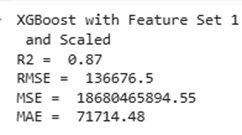

<h2 style="color: #ec7511;">Feature Importance Check</h2>

- Features importance checked on the basis of the XGBoost model with Feature Set 1.

In [373]:
feature_names = list(X_train.columns)
importances = xgbr.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

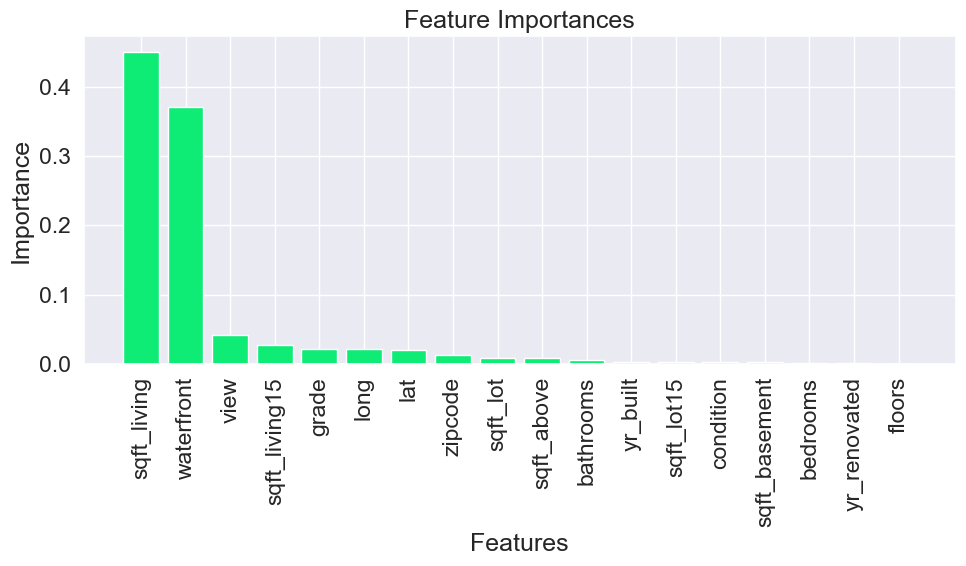

In [374]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color="#0eec75")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<h3 style="color: #ec300e;">Feature set with the 11 Most Important Features</h3>

Based on the insights from the graphic above, we will now build a model only with the **11 features** which show some kind of importance:

- sqft_living
- waterfront
- view
- sqft_living15
- grade
- long
- lat
- zipcode
- sqft_lot
- sqft_above
- bathrooms

This will be called "feature_set_best".

For this, we will use **XGBoost** and also **Random Forest** because the latter is less prone to overfitting and we want to compare the results.

A comment:
We have tried the following two tests also
1. with excluding all geographical data (**long, lat and zipcode**) and
2. with exluding long and lat but not zipcode.
3. with only the two most important features (sqft_living and waterfront)
 
Erasing zipcode proved to have a **big negative impact** on the results whereas long and lat only showed **slight (negative) changes** in the metrics. For these reasons, we decided to** keep all three in this model**.

Also, with only two predictors (sqft_living and waterfront), our predicitive power deacreased dramatically, so we decided to not include the calcultaion in the norebook.

<h4 style="color: #bb1010;">X-y Split</h4>

In [379]:
feature_set_best = num_all[["price", "sqft_living", "waterfront", "view", "sqft_living15", "grade", "long", "lat", "zipcode", "sqft_lot", "sqft_above", "bathrooms"]]

In [380]:
X_best = feature_set_best.drop("price", axis=1)
y_best = feature_set_best["price"]

<h4 style="color: #bb1010;">Train-Test Split</h4>

In [382]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.3, random_state=42)

<h4 style="color: #bb1010;">Random Forest Regression</h4>

In [384]:
rfr = RandomForestRegressor()
rfr.fit(X_train_best, y_train_best)
predictions_rf_best = rfr.predict(X_test_best)

<h5 style="color: #bb1066;">Metrics</h5>

In [386]:
r2_RF_best = r2_score(y_test_best, predictions_rf_best)
RMSE_RF_best = mean_squared_error(y_test_best, predictions_rf_best, squared=False)
MSE_RF_best = mean_squared_error(y_test_best, predictions_rf_best)
MAE_RF_best = mean_absolute_error(y_test_best, predictions_rf_best)

#Printing the results
print("Random Forest: 11 Most")
print("Important Features")
print("R2 = ", round(r2_RF_best, 2))
print("RMSE = ", round(RMSE_RF_best, 2))
print("MSE = ", round(MSE_RF_best, 2))
print("MAE = ", round(MAE_RF_best, 2))

Random Forest: 11 Most
Important Features
R2 =  0.86
RMSE =  141798.33
MSE =  20106766911.23
MAE =  73595.51


<h4 style="color: #bb1010;">XGBoost Regression</h4>

In [388]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_best, y_train_best)

predictions_xgb_best = xgbr.predict(X_test_best)

<h5 style="color: #bb1066;">Metrics</h5>

In [390]:
r2_XG_best = r2_score(y_test_best, predictions_xgb_best)
RMSE_XG_best = mean_squared_error(y_test_best, predictions_xgb_best, squared=False)
MSE_XG_best = mean_squared_error(y_test_best, predictions_xgb_best)
MAE_XG_best = mean_absolute_error(y_test_best, predictions_xgb_best)

#Printing the results
print("XGBoost: 11 Most")
print("Important Features")
print("R2 = ", round(r2_XG_best, 2))
print("RMSE = ", round(RMSE_XG_best, 2))
print("MSE = ", round(MSE_XG_best, 2))
print("MAE = ", round(MAE_XG_best, 2))

XGBoost: 11 Most
Important Features
R2 =  0.86
RMSE =  141715.54
MSE =  20083295574.23
MAE =  73526.72


<h4 style="color: #bb1010;">Summary on </h4>

❗**Summary of Feature Set Best**: ❗

The **R²** of both models is very high, yet **the other metrics remain high** too (the lower, the better as they represent the difference between the prediction and the empirical data points).

The **Random Forest here shows slightly better results** than the XGBoost but very slightly "worse" results than **our best model until now**:

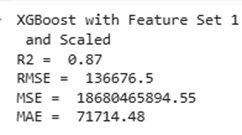



<h2 style="color: #ec7511;">Erasing Outliers before Model Building</h2>

Finally, we want to see whether eliminating outliers before bulding the model makes a difference. For this, we will define a datset with features which have a lot of outliers. We will then erase all rows from the original df which contains at least one of the so defined outliers, so that all our columns, including our taregt have the same structure.

In [395]:
# erasing outliers (based on condition defined below) from all features but our target "price"
features_wo_outliers = num_all.drop(columns=['price'])

In [396]:
# function to identify all outliers
def outliers(features_wo_outliers):
  Q1 = features_wo_outliers.quantile(0.25)
  Q3 = features_wo_outliers.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = (features_wo_outliers < lower_bound) | (features_wo_outliers > upper_bound)

  return outliers

# mask which sets all cells to False in order to filter out rows which contain outliers identified in the above function (next step)
outlier_mask = pd.DataFrame(False, index=num_all.index, columns=num_all.columns)

# function outliers is being applied on every feature and True assigned to outlier_mask if it is an outlier
for feature in features_wo_outliers:
    outlier_mask[feature] = outliers(num_all[feature])

# df for all rows which have at least one outlier
combined_outlier_mask = outlier_mask.any(axis=1)

# erasing these rows from the original dataset
num_all_cleaned_outliers = num_all[~combined_outlier_mask]

num_all_cleaned_outliers

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,221900.00
5631500400,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,180000.00
2487200875,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,604000.00
1954400510,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,510000.00
1321400060,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,257500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,360000.00
6600060120,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,400000.00
1523300141,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,402101.00


<h3 style="color: #ec300e;">X-y Split</h3> 

In [398]:
X_outliers = num_all_cleaned_outliers.drop("price", axis=1)
y_outliers = num_all_cleaned_outliers["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [400]:
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.3, random_state=42)

<h3 style="color: #ec300e;">Linear Regression</h3>

In [402]:
model = LinearRegression()
model.fit(X_train_outliers, y_train_outliers)

predictions_linear_outliers = model.predict(X_test_outliers)

<h4 style="color: #bb1010;">Metrics</h4>

In [404]:
r2_LR_outliers = r2_score(y_test_outliers, predictions_linear_outliers)
RMSE_LR_outliers = mean_squared_error(y_test_outliers, predictions_linear_outliers, squared=False)
MSE_LR_outliers = mean_squared_error(y_test_outliers, predictions_linear_outliers)
MAE_LR_outliers = mean_absolute_error(y_test_outliers, predictions_linear_outliers)

#Printing the results
print("Linear Regression with")
print("no Outliers in Train")
print("R2 = ", round(r2_LR_outliers, 2))
print("RMSE = ", round(RMSE_LR_outliers, 2))
print("MSE = ", round(MSE_LR_outliers, 2))
print("MAE = ", round(MAE_LR_outliers, 2))

Linear Regression with
no Outliers in Train
R2 =  0.64
RMSE =  121179.13
MSE =  14684381672.02
MAE =  86238.81


<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [406]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_outliers, y_train_outliers)

predictions_xgb_outliers = xgbr.predict(X_test_outliers)

<h4 style="color: #bb1010;">Metrics</h4>

In [408]:
r2_XG_outliers = r2_score(y_test_outliers, predictions_xgb_outliers)
RMSE_XG_outliers = mean_squared_error(y_test_outliers, predictions_xgb_outliers, squared=False)
MSE_XG_outliers = mean_squared_error(y_test_outliers, predictions_xgb_outliers)
MAE_XG_outliers = mean_absolute_error(y_test_outliers, predictions_xgb_outliers)

#Printing the results
print("XGBoost with")
print("no Outliers in Train")
print(f"R2 = {r2_XG_outliers:.2f}")
print(f"RMSE = {RMSE_XG_outliers:,.2f}")
print(f"MSE = {MSE_XG_outliers:,.2f}")
print(f"MAE = {MAE_XG_outliers:,.2f}")

XGBoost with
no Outliers in Train
R2 = 0.87
RMSE = 72,731.09
MSE = 5,289,810,875.94
MAE = 48,567.98


<h3 style="color: #ec300e;">Summary: Feature Set Without Outliers</h3>

This step brought a major increasement in the metrics.

- **Linear Regression**: even though the **R²** went down a little (baseline model: 0.7), the **other metrics improved very much**: the **RSME** and the **MAE** decreased ~1/3 to 1/2, and the **MSE** (which of course is most effected by outliers as it is a squared value) decreased almost by two thirds.
- **XGBoost**: for **RSME** and **MAE** goes the same as for the Linear Regression, the **MSE** even decreased by almost 3/4. One big difference is that the** R² stayed very high**.

So this is our **best model after all**.

<h1 style="color: #e3db24;">09 | Model High Priced Houses</h1>

- Here we analyze all houses above the 0.75 percentile/ in the fourth quartile separately. This means all houses which cost more than USD 650,000.

In [413]:
houses_high_prices

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7237550310,4,4.50,5420,101930,1.00,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,1225000.00
1736800520,3,2.50,3560,9796,1.00,0,0,3,8,1860,1700,1965,0,98007,47.60,-122.14,2210,8925,662500.00
9297300055,4,3.00,2950,5000,2.00,0,3,3,9,1980,970,1979,0,98126,47.57,-122.38,2140,4000,650000.00
2524049179,3,2.75,3050,44867,1.00,0,4,3,9,2330,720,1968,0,98040,47.53,-122.23,4110,20336,2000000.00
1794500383,3,1.75,2450,2691,2.00,0,0,3,8,1750,700,1915,0,98119,47.64,-122.36,1760,3573,937000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502800100,5,2.75,3600,9437,2.00,0,0,3,9,3600,0,2014,0,98059,47.48,-122.13,3550,9421,679950.00
191100405,4,3.25,3410,10125,2.00,0,0,3,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125,1575000.00
7202300110,4,3.00,3990,7838,2.00,0,0,3,9,3990,0,2003,0,98053,47.69,-122.05,3370,6814,810000.00


<h3 style="color: #ec300e;">X-y Split</h3> 

In [415]:
feature_high_price = houses_high_prices.copy()

In [416]:
X_high_price = feature_high_price.drop("price", axis=1)
y_high_price = feature_high_price["price"]

<h3 style="color: #ec300e;">Train-Test Split</h3>

In [418]:
X_train_high_price, X_test_high_price, y_train_high_price, y_test_high_price = train_test_split(X_high_price, y_high_price, test_size=0.3, random_state=42)

<h3 style="color: #ec300e;">Linear Regression</h3>

In [420]:
model = LinearRegression()
model.fit(X_train_high_price, y_train_high_price)

predictions_linear_high_price = model.predict(X_test_high_price)

<h4 style="color: #bb1010;">Metrics</h4>

In [422]:
r2_LG_high_price = r2_score(y_test_high_price, predictions_linear_high_price)
RMSE_LG_high_price = mean_squared_error(y_test_high_price, predictions_linear_high_price, squared=False)
MSE_LG_high_price = mean_squared_error(y_test_high_price, predictions_linear_high_price)
MAE_LG_high_price = mean_absolute_error(y_test_high_price, predictions_linear_high_price)

#Printing the results
print("Linear Regression with")
print("High Priced Houses")
print("R2 = ", round(r2_LG_high_price, 2))
print("RMSE = ", round(RMSE_LG_high_price, 2))
print("MSE = ", round(MSE_LG_high_price, 2))
print("MAE = ", round(MAE_LG_high_price, 2))

Linear Regression with
High Priced Houses
R2 =  0.58
RMSE =  285684.92
MSE =  81615874280.33
MAE =  189651.16


<h3 style="color: #ec300e;">XGBoost Regression</h3>

In [424]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_high_price, y_train_high_price)

predictions_xgb_high_prices = xgbr.predict(X_test_high_price)

<h4 style="color: #bb1010;">Metrics</h4>

In [426]:
r2_XG_high_price = r2_score(y_test_high_price, predictions_xgb_high_prices)
RMSE_XG_high_price = mean_squared_error(y_test_high_price, predictions_xgb_high_prices, squared=False)
MSE_XG_high_price = mean_squared_error(y_test_high_price, predictions_xgb_high_prices)
MAE_XG_high_price = mean_absolute_error(y_test_high_price, predictions_xgb_high_prices)

#Printing the results
print("XGBoost with")
print("High Priced Houses")
print("R2 = ", round(r2_XG_high_price, 2))
print("RMSE = ", round(RMSE_XG_high_price, 2))
print("MSE = ", round(MSE_XG_high_price, 2))
print("MAE = ", round(MAE_XG_high_price, 2))

XGBoost with
High Priced Houses
R2 =  0.74
RMSE =  226525.45
MSE =  51313778390.76
MAE =  125005.88


<h3 style="color: #ec300e;">Summary: High Price Houses</h3>

- The metrics for predicting high priced houses are high. Yet, they are lower than when predicting all types of prices (with and without outliers).